In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import pandas as pd
import os
import glob
import re
import sys
import pickle

from photutils.aperture import CircularAperture, aperture_photometry
from spectral_cube import SpectralCube

from astropy.time import Time
from astropy.coordinates import SkyCoord
from astropy.table import Table
import astropy.units as u
from astropy.wcs import WCS
from astropy.constants import c
from astropy.io import fits
from astropy.visualization import simple_norm, imshow_norm
from astropy.visualization import AsinhStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.visualization import SqrtStretch
from matplotlib.patches import Circle, Rectangle
from matplotlib.gridspec import GridSpec
from astropy.nddata import block_reduce
from astropy.nddata import Cutout2D

home_directory = "/d/ret1/Taylor/jupyter_notebooks/Research" 
os.chdir(home_directory) #TJ change working directory to be the parent directory

from Py_files.Basic_analysis import * #TJ import basic functions from custom package
from Py_files.Convolution_script import * #TJ import convolution functions from custom package
from Py_files.All_flux_calibration_functions import *
with open("Data_files/misc_data/jwst_pivots.pkl", "rb") as file:
    jwst_pivots = pickle.load(file)
with open("Data_files/misc_data/jwst_filter_means.pkl", "rb") as file:
    jwst_means = pickle.load(file)

image_files, filter_files = generate_list_of_files()
v0p3_images, _ = generate_v0p3_files()
full_raw_ifu_files_loc0 = ['Data_files/IFU_files/raw_IFUs/location_0/jw03435-o004_t005_nirspec_g140m-f100lp_s3d_trimmed.fits',
              'Data_files/IFU_files/raw_IFUs/location_0/jw03435-o004_t005_nirspec_g235m-f170lp_s3d_trimmed.fits',
              'Data_files/IFU_files/raw_IFUs/location_0/jw03435-o004_t005_nirspec_g395m-f290lp_s3d.fits',
              'Data_files/IFU_files/raw_IFUs/location_0/Arm1_Level3_ch1-shortmediumlong_s3d.fits',
              'Data_files/IFU_files/raw_IFUs/location_0/Arm1_Level3_ch2-shortmediumlong_s3d.fits',
              'Data_files/IFU_files/raw_IFUs/location_0/Arm1_Level3_ch3-shortmediumlong_s3d.fits',
              'Data_files/IFU_files/raw_IFUs/location_0/Arm1_Level3_ch4-shortmediumlong_s3d_trimmed.fits']
full_raw_ifu_files_loc1 = ['Data_files/IFU_files/raw_IFUs/location_1/jw03435-o012_t014_nirspec_g140m-f100lp_s3d_trimmed.fits',
              'Data_files/IFU_files/raw_IFUs/location_1/jw03435-o012_t014_nirspec_g235m-f170lp_s3d_trimmed.fits',
              'Data_files/IFU_files/raw_IFUs/location_1/jw03435-o012_t014_nirspec_g395m-f290lp_s3d.fits',
              'Data_files/IFU_files/raw_IFUs/location_1/Arm2_Level3_ch1-shortmediumlong_s3d.fits',
              'Data_files/IFU_files/raw_IFUs/location_1/Arm2_Level3_ch2-shortmediumlong_s3d.fits',
              'Data_files/IFU_files/raw_IFUs/location_1/Arm2_Level3_ch3-shortmediumlong_s3d.fits',
              'Data_files/IFU_files/raw_IFUs/location_1/Arm2_Level3_ch4-shortmediumlong_s3d_trimmed.fits']
#TJ location 2 also within loc1 files
full_raw_ifu_files_loc3 = ['Data_files/IFU_files/raw_IFUs/location_3/jw03435-o006_t010_nirspec_g140m-f100lp_s3d_trimmed.fits',
              'Data_files/IFU_files/raw_IFUs/location_3/jw03435-o006_t010_nirspec_g235m-f170lp_s3d_trimmed.fits',
              'Data_files/IFU_files/raw_IFUs/location_3/jw03435-o006_t010_nirspec_g395m-f290lp_s3d.fits',
              'Data_files/IFU_files/raw_IFUs/location_3/Arm3_Level3_ch1-shortmediumlong_s3d.fits',
              'Data_files/IFU_files/raw_IFUs/location_3/Arm3_Level3_ch2-shortmediumlong_s3d.fits',
              'Data_files/IFU_files/raw_IFUs/location_3/Arm3_Level3_ch3-shortmediumlong_s3d.fits',
              'Data_files/IFU_files/raw_IFUs/location_3/Arm3_Level3_ch4-shortmediumlong_s3d_trimmed.fits']
#TJ this full_spectrum is built by stitching cube0 to cube1 anchored to cube1
#TJ then stitching cube2 to cube3 anchored to cube3, then stitching all the others unaltered
full_spec = 'Data_files/misc_data/Updated_flux_calibration/full_spectrum_loc0_rad1p25.npy'
locations = [[202.5062429, 47.2143358], [202.4335225, 47.1729608], [202.4340450, 47.1732517], [202.4823742, 47.1958589]]
radius = 1.25*u.arcsec
r0 = 1.25*u.arcsec
r1 = 0.9*u.arcsec
r2 = 1*u.arcsec
r3 = 1.1*u.arcsec
filter_names = [extract_filter_name(x) for x in filter_files]

**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-068 DOESN'T MATCH THE CURRENT ONLINE VERSION PRDOPSSOC-071
Please consider updating pysiaf, e.g. pip install --upgrade pysiaf or conda update pysiaf


True
/d/ret1/Taylor/stpsf-data/


A total of 1 were detected within 1.25 arcsec in jw03435-o004_t005_nirspec_g395m-f290lp_s3d.fits over 1341 WLs
1.162389e-06
Combined spectrum: 9.7031802861602e-07 -- 1.8893380453519088e-06
1.407446e-06
Combined spectrum: 9.7031802861602e-07 -- 1.8893380453519088e-06
1.510423e-06
Stitching RIGHT: anchor → file 1
Combined spectrum: 9.7031802861602e-07 -- 3.1689100217191535e-06
1.6445950000000002e-06
Stitching RIGHT: anchor → file 1
Combined spectrum: 9.7031802861602e-07 -- 3.1689100217191535e-06
1.84943e-06
Stitching RIGHT: anchor → file 1
Combined spectrum: 9.7031802861602e-07 -- 3.1689100217191535e-06
1.8739650000000003e-06
Stitching RIGHT: anchor → file 1
Combined spectrum: 9.7031802861602e-07 -- 3.1689100217191535e-06
2.0028150000000003e-06
Stitching RIGHT: anchor → file 1
Combined spectrum: 9.7031802861602e-07 -- 3.1689100217191535e-06
2.0982220000000003e-06
Combined spectrum: 1.6605299666408e-06 -- 3.1689100217191535e-06
2.1213970000000003e-06
Combined spectrum: 1.6605299666408e-06

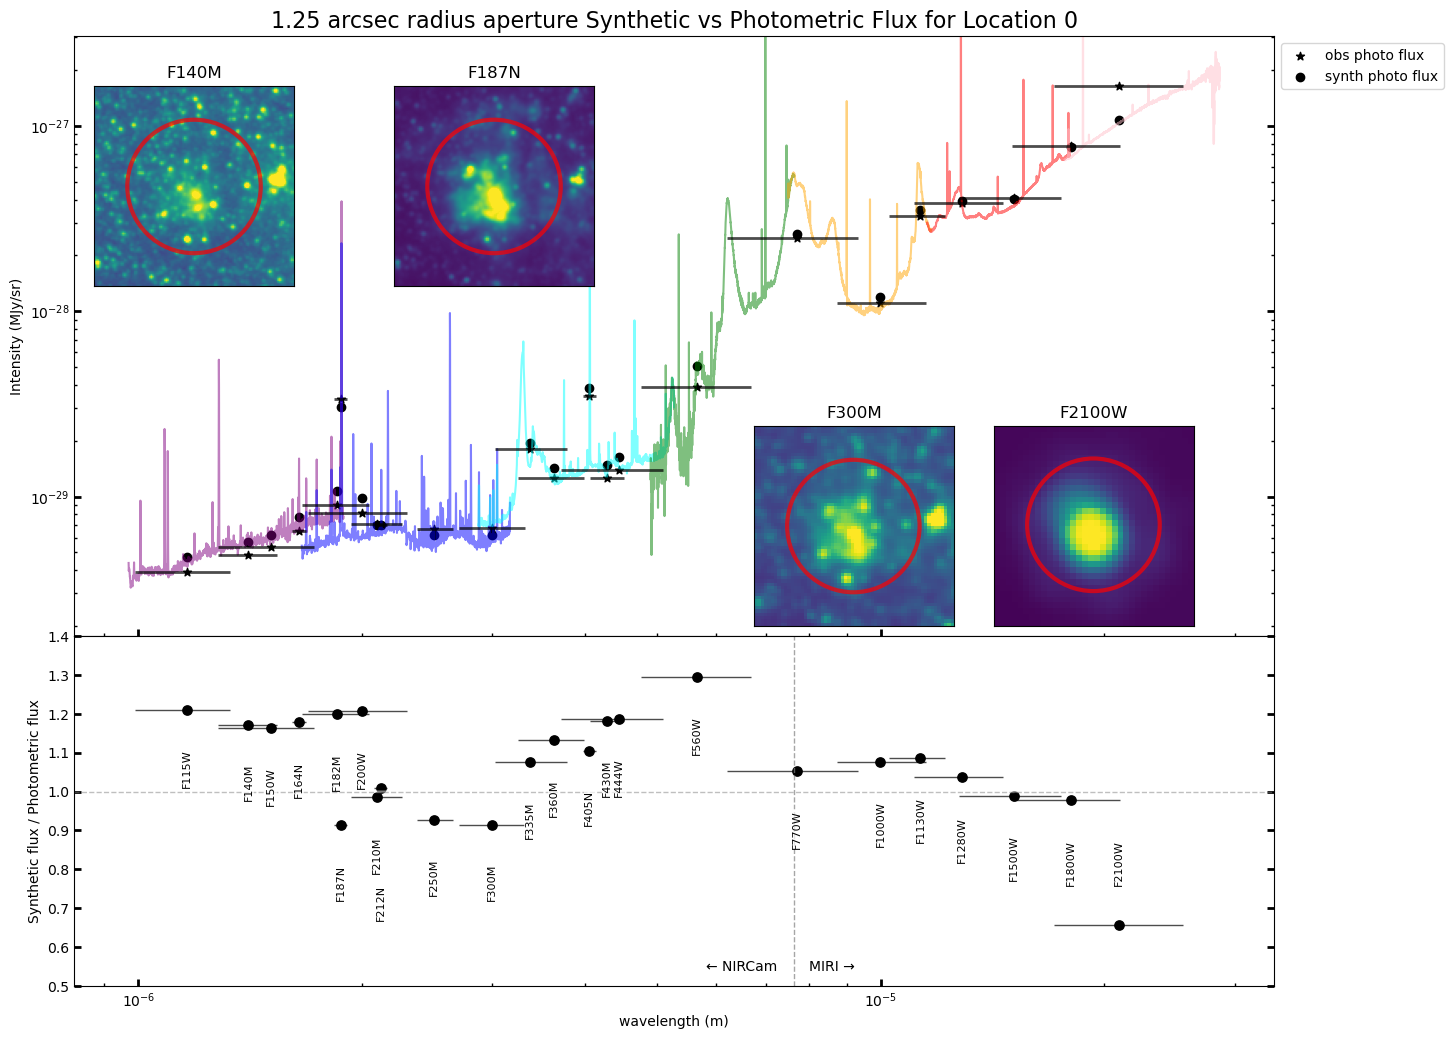

In [4]:
def IFUs_with_coverage(filter_name, list_of_IFUs):
    '''return which raw files are at least partially contained within this filter
    
    -------------
    
    Parameters
    -------------
    filter_name : type = string - upper case filter name
    list_of_IFUs : type = list - list of IFU files
    Returns
    -------------
    list of raw ifu files
    '''   
    needed = []
    low, high = [x.value for x in get_filter_wl_range(filter_name)]
    for file in list_of_IFUs:
        wl = SpectralCube.read(file, hdu = 'SCI').spectral_axis.to(u.m).value
        if (wl[-1] >= low and wl[0] <= high):
            needed.append(file)
    return needed

def show_spec_and_all_filters(list_of_IFUs, list_of_photos, loc, radius, show_images = [1, 5, 10, 23], save_data = False, save_fig = None):
    '''Plots spectrum and overplots the observed flux through filters within that spectrum's range.
    Loops through photo files, so feel free to include extraneous IFU files but do not include multiple photos of same filter
    This includes multiple convolutions of the same photo, just call the function again if that is the case.
    -------------
    
    Parameters
    -------------
    list_of_IFUs : type = list - list of IFU files to be stitched together and plotted
    list_of_photos : type = list - list of photo files from which to extract filter bandpass fluxes
    loc : type = either [ra, dec] in degrees, or a SkyCoord object - location of center of the aperture
    radius : type = angular size - radius of aperture, must have units attached.
    save_data (optional) : if provided, saves entire data output to a numpy file at the location provided
    
    Returns
    -------------
    If saving data, it returns the filepath to the data, otherwise Nothing, just plots.
    ''' 
    fig = plt.figure(figsize=(12, 10))
    
    ax_spec = fig.add_axes((0.05, 0.4, 1, 0.6))
    ax_scat = fig.add_axes((0.05, 0.05, 1, 0.35))
    if loc == [202.5062429, 47.2143358]:
        loc_index = 0
    elif loc == [202.4335225, 47.1729608]:
        loc_index = 1
    elif loc == [202.4340450, 47.1732517]:
        loc_index = 2
    elif loc == [202.4823742, 47.1958589]:
        loc_index = 3
    else:
        loc_index = "?"
    cube_colors = ['purple', 'blue', 'cyan', 'green', 'orange', 'red', 'pink']
    short_bounds = []
    long_bounds = []
    spec_y_min = 1 #TJ Flux should always be around 10^-20 so setting limits of 0-1 should never be too strict
    spec_y_max = 0
    for i, ifu_file in  enumerate(list_of_IFUs):
        cube = SpectralCube.read(ifu_file, hdu = 'SCI')
        wl = cube.spectral_axis.to(u.m)
        short_bounds.append(wl[0])
        long_bounds.append(wl[-1])
        ifu_data = get_IFU_spectrum(ifu_file, loc, radius, replace_negatives = False)
        ax_spec.plot(ifu_data['wavelength'], ifu_data['intensity'], alpha = 0.5, color = cube_colors[i])
        spec_y_min = min(spec_y_min, np.percentile(ifu_data['intensity'], 1)*0.5)
        spec_y_max = max(spec_y_max, np.percentile(ifu_data['intensity'], 98)*1.5)
        ax_scat.plot(ifu_data['wavelength'], [1]*len(ifu_data['wavelength']), alpha = 0.5, color = 'white')



    cmap = cm.get_cmap('rainbow', len(list_of_photos)) #TJ create colormap with enough colors to cover all the filters (1photo=1filter)
    colors = [cmap(i) for i in range(len(list_of_photos))]
    filter_mean_wls = [] #TJ initialize filter mean wavelengths for x-axis
    
    y_data = [] #TJ initialize synth/photo array for y-axis


    for p, photo_file in enumerate(list_of_photos): #TJ loop through photos, since there will never be duplicates for this
        try:
            filter_name = extract_filter_name(photo_file) #TJ pull out filter name to be used for full loop
        except:
            print(f'filter name not identified in {photo_file.split("/")[-1]}')
        filter_names.append(filter_name) #TJ add filter name to x-axis
        filter_file = [flt for flt in filter_files if extract_filter_name(flt) == filter_name][0] #TJ grab the filter file for this filter
        filter_wl, filter_trans = get_filter_data(filter_name)
        filter_short_wl, filter_long_wl = [x.value for x in get_filter_wl_range(filter_name)] #TJ used for plotting filter coverages

        photo_flux = get_image_flux(photo_file, loc, radius, replace_negatives = False) #TJ get aperture sum of photo flux
        
        filter_mean = jwst_means[filter_name].value #TJ record filter mean wavelength for color differentiation in plotting
        filter_mean_wls.append(filter_mean)
        print(filter_mean)
        try: #TJ it is much faster to give this function an array rather than fits files, so if that was the case, do this.
            wavelength, flux = np.load(list_of_IFUs) 
            synth_flux = get_Fnu_transmission(flux, wavelength, filter_trans, filter_wl, warnings = True) #TJ apply filter transmission and aperture sum
            title = f"Full spectrum using numpy file {list_of_IFUs.split('/')[-1]}"
        except: #TJ if loading the numpy array fails for whatever reason, go through longer process
            #TJ first, check if these are raw IFU files identified by ending with s3d
            try: 
                ifu_files = IFUs_with_coverage(filter_name, list_of_IFUs) #TJ grab all the raw files that have at least some coverage in filter
                title = 'Using all IFUs with coverage'
            except:
                print(f'IFU files not found for {filter_name}')
            #TJ if two files are needed
            ifu_data = stitch_spectra(ifu_files, loc, radius, replace_negatives = False)
            synth_flux = get_Fnu_transmission(ifu_data['intensity'], ifu_data['wavelength'], filter_trans, filter_wl, warnings = True)
            wavelength = ifu_data['wavelength']
            flux = ifu_data['intensity']
        
        y_data.append(synth_flux/photo_flux)
        ax_spec.scatter(filter_mean, photo_flux, label = '', marker = "*", color = 'black')
        ax_spec.scatter(filter_mean, synth_flux, marker = "o", color = 'black')
        ax_spec.hlines(y=photo_flux, xmin=filter_short_wl, xmax=filter_long_wl, color='black', alpha=0.7, linewidth=2)
        ax_scat.hlines(y=y_data[-1], xmin=filter_short_wl, xmax=filter_long_wl, color='black', alpha=0.7, linewidth=1)

    filter_mean_wls = np.array([float(w) for w in filter_mean_wls])
    ax_spec.scatter([], [], label = 'obs photo flux', marker = "*", color = 'black')
    ax_spec.scatter([], [], label = 'synth photo flux', marker = "o", color = 'black')
    ax_spec.set_yscale('log')
    ax_spec.set_xscale('log')
    ax_spec.set_xticklabels(ax_spec.get_xticklabels())
    ax_spec.set_ylim(spec_y_min, spec_y_max)
    ax_spec.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
    ax_spec.set_title(title)
    ax_spec.set_ylabel('Intensity (MJy/sr)')
    images = list_of_photos[show_images]
    image_names = [extract_filter_name(x) for x in images]
    image_locations = [(0.05, 0.75, 0.2, 0.2), (0.3, 0.75, 0.2, 0.2), (0.6, 0.41, 0.2, 0.2), (0.8, 0.41, 0.2, 0.2), (0.85, 0.65, 0.18, 0.18)]
    
    for i, (img, title) in enumerate(zip(images, image_names)):
        ax = fig.add_axes(image_locations[i])
        image_file = img
        hdu = fits.open(image_file)['SCI']
        image = hdu.data
        image_header = hdu.header
        image_wcs = WCS(image_header, naxis=2)
        pixel_scale = np.abs(image_wcs.wcs.cdelt[0]) * 3600  # arcsec/pixel
    
        loc_sky = SkyCoord(ra=loc[0]*u.deg, dec=loc[1]*u.deg, frame='icrs')
        cutout = Cutout2D(data = image, position = loc_sky, size = (radius*3, radius*3), wcs = image_wcs)
        ax.set_title('F115W image with bump apertures', fontsize = 30)
        x_img, y_img = cutout.wcs.all_world2pix(loc_sky.ra, loc_sky.dec, 0)
        ax.imshow(cutout.data, origin='lower', cmap='viridis',
                              norm=ImageNormalize(cutout.data, stretch=AsinhStretch(), vmin=0, vmax=np.percentile(cutout.data, 99)))
        ax.add_patch(Circle((x_img, y_img), (radius.to(u.arcsec).value)/pixel_scale, ec='red', fc='none', lw=3, ls='-', alpha = 0.7))
        ax.set_title(title)
        ax.set_xticks([])
        ax.set_yticks([])
    
    colors_for_cubes = ['purple', 'blue', 'green', 'yellow', 'orange', 'red', 'pink']

    point_colors = []
    for f in filter_names:
        fmin, fmax = get_filter_wl_range(f)
    
        fully_covering = []
        partially_covering = []
    
        for i, (cmin, cmax) in enumerate(zip(short_bounds, long_bounds)):
            # Full coverage
            if (fmin >= cmin) and (fmax <= cmax):
                fully_covering.append(i)
            # Partial overlap
            elif (fmax > cmin) and (fmin < cmax):
                partially_covering.append(i)
    
        # Decide color
        if len(fully_covering) == 1:
            point_colors.append(colors_for_cubes[fully_covering[0]])
        elif len(partially_covering) == 2:
            point_colors.append('black')
        else:
            point_colors.append('white')

    ax_scat.scatter(filter_mean_wls, y_data, marker="o", c='black', s=45)
    renderer = ax_spec.figure.canvas.get_renderer()
    label_positions = []  # to store display-space positions
    
    for x, y, name in zip(filter_mean_wls, y_data, filter_names):
        # initial offset (just below the point)
        y_offset = -0.1 
        
        # convert data point to display coords
        x_disp, y_disp = ax_spec.transData.transform((x, y))
        
        # check overlap in display coordinates
        too_close = False
        for (xx, yy) in label_positions:
            if abs(x_disp - xx) < 10 and abs(y_disp + y_offset - yy) < 5:  
                # 20px horizontal & 12px vertical proximity → overlap
                too_close = True
                break
        
        # if overlapping, nudge upward instead of downward
        if too_close:
            y_offset = -0.25  
        if y < 0.8:
            y_offset = +0.22
        # save adjusted label display position
        label_positions.append((x_disp, y_disp + y_offset))
                

        # actually plot text in data coordinates
        ax_scat.text(
            x, y + y_offset,
            name,
            ha="center", va="top",
            fontsize=8, rotation = 90,
            bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, pad=0.5)
        )
    ax_scat.set_xlabel("wavelength (m)")
    ax_scat.set_ylabel("Synthetic flux / Photometric flux")
    ax_scat.set_xscale('log')
    ax_scat.axhline(y = 1, color = 'gray', linestyle = '--', linewidth = 1, alpha = 0.5)
    ax_scat.axvline(x=7.650000025896587e-06, color='gray', linestyle='--', linewidth=1, alpha=0.7)
    ax_scat.set_ylim(0.5,1.4)
    ymin, ymax = ax_scat.get_ylim()
    text_y_pos = ymin * 1.1
    
    ax_spec.set_title(f'{radius} radius aperture Synthetic vs Photometric Flux for Location {loc_index}', fontsize=16)
    #ax_scat.set_xticklabels(ax_scat.get_xticklabels(), rotation=45)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    ax_scat.tick_params(axis = "both", which = 'major', width = 2, length = 5, right = 2, direction = 'in', labelsize = 10)
    ax_scat.tick_params(axis = "both", which = 'minor', width = 1, length = 2, right = 2, direction = 'in', labelsize = 10)
    ax_spec.tick_params(axis = "both", which = 'major', width = 2, length = 5, right = 2, direction = 'in', labelsize = 10)
    ax_spec.tick_params(axis = "both", which = 'minor', width = 1, length = 2, right = 2, direction = 'in', labelsize = 10)
    
    # Add NIRCam label to the left
    ax_scat.text(7.25e-6, text_y_pos, "← NIRCam", 
             ha='right', va='center', 
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2),
             fontsize=10)
    
    # Add MIRI label to the right
    ax_scat.text(8e-6, text_y_pos, "MIRI →", 
             ha='left', va='center', 
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2),
             fontsize=10)
    if save_fig is not False and save_fig is None:
        save_fig = 'Spectrum_with_filters_figure.png'
    elif save_fig is not False:
        plt.savefig(save_fig)
    plt.show()
    
    return y_data

def get_annulus_flux(image_file, location, radius, thickness):
    """Returns the total flux through the annulus centered at location, with outer radius and thickness from image file"""
    
    big_flux = get_image_flux(image_file, location, radius)
    little_flux = get_image_flux(image_file, location, u.arcsec*max((radius-thickness).value, 1e-6))
    return big_flux - little_flux
    
def make_radial_profile(image_files, location, thickness = 0.1*u.arcsec, max_radius = 2.5*u.arcsec, 
                        show_plot = True, bumps = False, show_image = 0):
    """Plots intensity within annulus vs annulus radius for all image files.

    """

    filter_names = [extract_filter_name(image_file) for image_file in image_files]
    if show_plot:
        
        fig = plt.figure(figsize = (45,30))
        fontsize_sm = 40
        fontsize_lg = 45
        ax_scatter = fig.add_axes((0.05, 0.05, 0.85, 0.85))
    for i, file in enumerate(image_files):
        if i < 8:
            marker = '*'
        elif i < 15:
            marker = 'o'
        else:
            marker = 'x'
        
        annulus_flux = []
        annulus_radius = []
        annulus_area = []
        annulus_intensity = []
        effective_radius = None
        for r1 in np.linspace(thickness.value, max_radius.value, 49):
            out_radius = r1*u.arcsec
            flux = get_annulus_flux(file, location, out_radius, thickness)
            area = (np.pi*(((r1**2 - (r1-thickness.value)**2)*u.deg**2).to(u.sr))).value
            annulus_flux.append(flux)
            annulus_radius.append((out_radius - (thickness/2)).value)
            annulus_area.append(area)
            annulus_intensity.append(flux/area)

        annulus_flux = np.array(annulus_flux)
        annulus_radius = np.array(annulus_radius)
        annulus_area = np.array(annulus_area)
        annulus_intensity = np.array(annulus_intensity)
    
        ax_scatter.scatter(annulus_radius, annulus_intensity, label=f'{extract_filter_name(file)}', marker = marker, s = 150)
    colors = ['red', 'black', 'blue']
    if len(bumps)>3:
        print('only three apertures can be shown in the image, additional apertures discarded')
    for i, bump in enumerate(bumps):
        if i > 2:
            break
        bump_inner = (bump - (thickness/2)).value 
        bump_outer = (bump + (thickness/2)).value 
        ax_scatter.axvline(x=bump_inner, linestyle = '--', color = colors[i])
        ax_scatter.axvline(x=bump_outer, linestyle = '--', color = colors[i])

    ax_scatter.tick_params(axis='x', which='minor', width=2, length=10, right=True, top=True, direction='in',
                       labelsize=fontsize_sm)
    ax_scatter.tick_params(axis='x', which='major', width=3, length=15, right=True, top=True, direction='in',
                       labelsize=fontsize_sm)
    ax_scatter.tick_params(axis='y', which='both', width=3, length=15, right=True, top=True, direction='in',
                       labelsize=fontsize_sm)
    ax_scatter.set_yscale('log')
    ax_scatter.set_xlabel('Aperture radius (arcseconds)', fontsize = 40)
    ax_scatter.set_ylabel('Aperture intensity (MJy/sr)', fontsize = 40)
    ax_scatter.set_title(f'{thickness}-wide annular intensity vs radius', fontsize = 50)

    legend = fig.legend(loc='upper left', bbox_to_anchor=(0.9, 0.85), fontsize=45)
    for handle in legend.legendHandles:
        handle.set_sizes([500])
    
    #image plot
    image_file = image_files[show_image]
    hdu = fits.open(image_file)['SCI']
    image = hdu.data
    image_header = hdu.header
    image_wcs = WCS(image_header, naxis=2)
    pixel_scale = np.abs(image_wcs.wcs.cdelt[0]) * 3600  # arcsec/pixel

    loc_sky = SkyCoord(ra=location[0]*u.deg, dec=location[1]*u.deg, frame='icrs')
    cutout = Cutout2D(data = image, position = loc_sky, size = (max_radius*2, max_radius*2), wcs = image_wcs)
    ax_image = fig.add_axes((0.57, 0.5, 0.4, 0.4), projection = cutout.wcs)
    ax_image.set_title('F115W image with bump apertures', fontsize = 30)
    x_img, y_img = cutout.wcs.all_world2pix(loc_sky.ra, loc_sky.dec, 0)
    ax_image.imshow(cutout.data, origin='lower', cmap='viridis',
                          norm=ImageNormalize(cutout.data, stretch=AsinhStretch(), vmin=0, vmax=np.percentile(cutout.data, 99)))
    for i, bump in enumerate(bumps):    
        bump_pix_inner = (bump-(thickness/2)).to(u.arcsec).value / pixel_scale
        bump_pix_outer = (bump+(thickness/2)).to(u.arcsec).value / pixel_scale
        
        ax_image.add_patch(Circle((x_img, y_img), bump_pix_inner, ec=colors[i], fc='none', lw=3, ls='-', alpha = 0.7))
        ax_image.add_patch(Circle((x_img, y_img), bump_pix_outer, ec=colors[i], fc='none', lw=3, ls='-', alpha = 0.7))

    plt.show()
    return [annulus_radius, annulus_intensity]

def show_images(image_files, loc, radius, ncols=3, cmap='viridis'):
    """
    Create a collage of cutout images with an aperture overlay.
    
    Parameters
    ----------
    list_of_image_fits_files : list of str
        List of FITS image file paths (must contain SCI extension).
    loc : list, tuple, or SkyCoord
        Location of aperture center, either [RA, Dec] in degrees or a SkyCoord object.
    radius : Quantity
        Aperture radius (must have angular units, e.g. arcsec).
    ncols : int, optional
        Number of columns in the collage (default = 3).
    cmap : str, optional
        Colormap for displaying images (default = 'viridis').
    """
    
    # Make sure loc is SkyCoord
    if not isinstance(loc, SkyCoord):
        loc_sky = SkyCoord(ra=loc[0]*u.deg, dec=loc[1]*u.deg, frame='icrs')
    else:
        loc_sky = loc

    n_images = len(image_files)
    nrows = int(np.ceil(n_images / ncols))
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 5*nrows), 
                             subplot_kw={'projection': None})
    axes = np.atleast_1d(axes).ravel()  # Flatten in case of 1 row/col
    
    for ax, image_file in zip(axes, image_files):
        # Load FITS
        hdu = fits.open(image_file)['SCI']
        image = hdu.data
        header = hdu.header
        wcs = WCS(header, naxis=2)
        pixel_scale = np.abs(wcs.wcs.cdelt[0]) * 3600  # arcsec/pixel

        # Make cutout
        cutout = Cutout2D(image, position=loc_sky, size=(radius*3, radius*3), wcs=wcs)

        # Convert SkyCoord -> pixel coords
        x_img, y_img = cutout.wcs.world_to_pixel(loc_sky)

        # Plot
        ax.imshow(cutout.data, origin='lower', cmap=cmap,
                  norm=ImageNormalize(cutout.data, stretch=AsinhStretch(), 
                                      vmin=0, vmax=np.percentile(cutout.data, 99)))
        ax.add_patch(Circle((x_img, y_img), 
                            (radius.to(u.arcsec).value)/pixel_scale, 
                            ec='red', fc='none', lw=2, alpha=0.7))
        
        ax.set_title(image_file.split("/")[-1], fontsize=12)
        ax.set_xticks([])
        ax.set_yticks([])

    # Hide empty panels if n_images doesn’t fill full grid
    for ax in axes[n_images:]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

def trim_last_wavelengths(input_file, output_file=None, n_cut=10):
    """
    Cut off the last n_cut wavelength slices from an IFU cube and save.

    Parameters
    ----------
    input_file : str
        Path to input FITS cube.
    output_file : str, optional
        Path to save trimmed cube. If None, appends '_trimmed' to input name.
    n_cut : int
        Number of slices to remove from the end of the wavelength axis.
    """

    # Read in the cube
    cube = SpectralCube.read(input_file, hdu = 'SCI')

    # Remove last n_cut channels
    trimmed_cube = cube[:-n_cut]

    # Decide output filename
    if output_file is None:
        root, ext = os.path.splitext(input_file)
        output_file = f"{root}_trimmed{ext}"

    # Write to disk
    trimmed_cube.write(output_file, overwrite=True)

    print(f"Trimmed cube saved to {output_file}")
    return output_file

def make_synthetic_image(ifu_file, filter_name, output_file=None,
                         real_image_file=None, loc=None, radius=None,
                         display=False, stretch='asinh'):
    """
    Create a synthetic image through a given filter from an IFU cube.
    
    Parameters
    ----------
    ifu_file : str
        Path to IFU FITS file (flux vs. wavelength, y, x).
    filter_name : str
        Name of the filter to apply.
    output_file : str, optional
        Name of output FITS file for the synthetic image.
    real_image_file : str, optional
        Path to real image file for side-by-side comparison.
    display : bool, optional
        If True, display the synthetic image (and real image if provided).
    filter_info : dict, optional
        Information needed by `Get_Fnu_transmission`.
    
    Returns
    -------
    hdu_out : fits.HDUList
        HDU list containing the synthetic image.
    """
    filter_file = []
    # Load IFU cube with SpectralCube
    cube = SpectralCube.read(ifu_file, hdu = "SCI")
    ifu_header = fits.open(ifu_file)['SCI'].header
    ifu_wcs = WCS(ifu_header)
    wl = cube.spectral_axis.to(u.m).value   # or 'angstrom' depending on your needs
    ny, nx = cube.shape[1:]  # cube.shape = (nchan, ny, nx)

    # Allocate synthetic image
    synthetic = np.zeros((ny, nx))
    filter_filepath = [flt for flt in filter_files if extract_filter_name(flt) == filter_name][0]
    filter_data = []
    with open(filter_filepath, 'r') as f:
        header = f.readline().strip().split()
        for line in f:
            data_line = line.strip().split()
            filter_data.append(data_line)
            
    header, filter_T = filter_data[:2], np.array(filter_data[2:])
    filter_wl = [try_float(filter_T[i,0])*1e-10 for i in range(len(filter_T))]
    filter_trans = [try_float(filter_T[i,1]) for i in range(len(filter_T))]

    # Loop over spaxels
    for y in range(ny):
        for x in range(nx):
            flux = cube[:, y, x].value  # spectrum in native cube units
            synthetic[y, x] = get_Fnu_transmission(flux, wl,  filter_trans, filter_wl)

    # Build header (use 2D spatial WCS from cube)
    hdr2d = cube.wcs.celestial.to_header()
    hdu_out = fits.PrimaryHDU(synthetic, header=hdr2d)
    hdul_out = fits.HDUList([hdu_out])

    if output_file:
        hdul_out.writeto(output_file, overwrite=True)

    # Display if requested
    if display:
        # Choose stretch
        if stretch == 'asinh':
            stretch_func = AsinhStretch()
        elif stretch == 'log':
            stretch_func = LogStretch()
        else:
            raise ValueError("stretch must be 'asinh' or 'log'")

        fig, ax = plt.subplots(1, 2 if real_image_file else 1, figsize=(12, 6))

        # Show real image if provided
        if real_image_file:
            hdu_real = fits.open(real_image_file)['SCI']
            image_data = hdu_real.data
            image_wcs = WCS(hdu_real.header, naxis=2)

            ny, nx = synthetic.shape
            center = SkyCoord.from_pixel(nx/2, ny/2, ifu_wcs)
            cutout = Cutout2D(data=image_data, position=center,
                              size=(ny, nx), wcs=image_wcs)

            real_data = cutout.data
            real_wcs = cutout.wcs
            norm_real = ImageNormalize(real_data,
                                       stretch=stretch_func,
                                       vmin=0,
                                       vmax=np.percentile(real_data, 99))
            ax[0].imshow(real_data, origin='lower', cmap='viridis', norm=norm_real)
            ax[0].set_title("Real Image")

            # Synthetic image in the same figure
            norm_syn = ImageNormalize(synthetic,
                                      stretch=stretch_func,
                                      vmin=0,
                                      vmax=np.percentile(synthetic, 99))
            ax[1].imshow(synthetic, origin='lower', cmap='viridis', norm=norm_syn)
            ax[1].set_title(f"Synthetic {filter_name}")
        
        else:
            norm_syn = ImageNormalize(synthetic,
                                      stretch=stretch_func,
                                      vmin=0,
                                      vmax=np.percentile(synthetic, 99))
            ax.imshow(synthetic, origin='lower', cmap='viridis', norm=norm_syn)
            ax.set_title(f"Synthetic {filter_name}")

        plt.show()
    return hdul_out

y_data = show_spec_and_all_filters(full_raw_ifu_files_loc0, v0p3_images, locations[0], r0, show_images = [1, 5, 10, 23], save_data = False, save_fig = False)

A total of 1 were detected within 1.25 arcsec in jw03435-o004_t005_nirspec_g395m-f290lp_s3d.fits over 1341 WLs
1.162389e-06
Combined spectrum: 9.7031802861602e-07 -- 1.8893380453519088e-06
1.407446e-06
Combined spectrum: 9.7031802861602e-07 -- 1.8893380453519088e-06
1.510423e-06
Stitching RIGHT: anchor → file 1
Combined spectrum: 9.7031802861602e-07 -- 3.1689100217191535e-06
1.6445950000000002e-06
Stitching RIGHT: anchor → file 1
Combined spectrum: 9.7031802861602e-07 -- 3.1689100217191535e-06
1.84943e-06
Stitching RIGHT: anchor → file 1
Combined spectrum: 9.7031802861602e-07 -- 3.1689100217191535e-06
1.8739650000000003e-06
Stitching RIGHT: anchor → file 1
Combined spectrum: 9.7031802861602e-07 -- 3.1689100217191535e-06
2.0028150000000003e-06
Stitching RIGHT: anchor → file 1
Combined spectrum: 9.7031802861602e-07 -- 3.1689100217191535e-06
2.0982220000000003e-06
Combined spectrum: 1.6605299666408e-06 -- 3.1689100217191535e-06
2.1213970000000003e-06
Combined spectrum: 1.6605299666408e-06

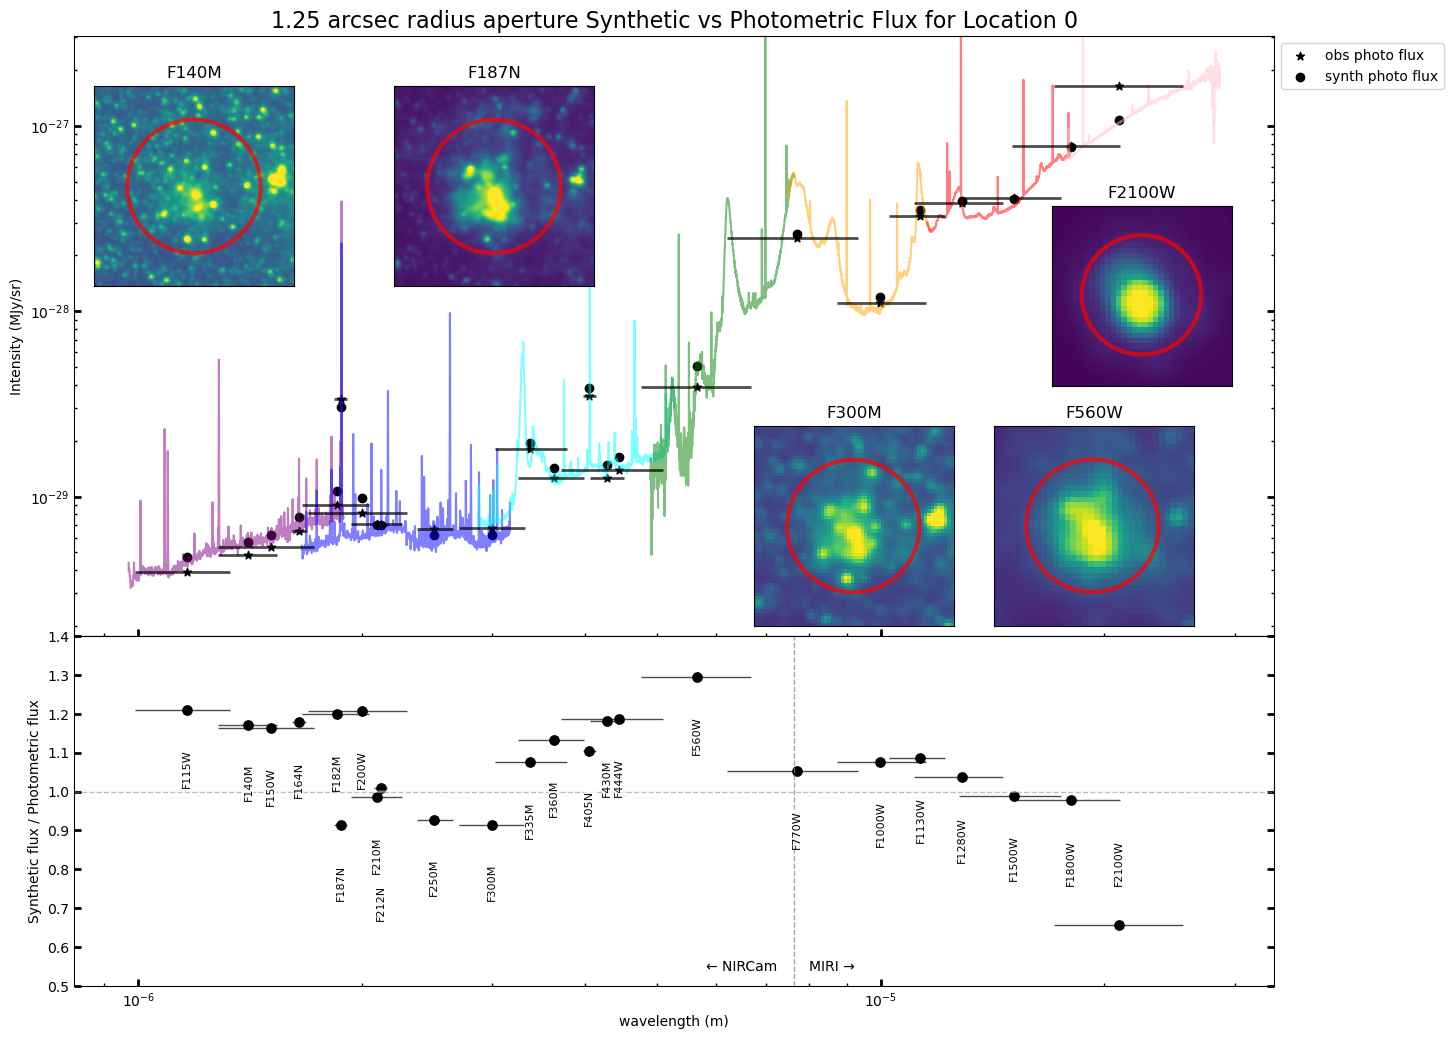

A total of 2 were detected within 0.9 arcsec in jw03435-o012_t014_nirspec_g235m-f170lp_s3d_trimmed.fits over 1424 WLs
A total of 10 were detected within 0.9 arcsec in jw03435-o012_t014_nirspec_g395m-f290lp_s3d.fits over 1341 WLs
1.162389e-06
Combined spectrum: 9.7031802861602e-07 -- 1.8893380453519088e-06
1.407446e-06
Combined spectrum: 9.7031802861602e-07 -- 1.8893380453519088e-06
1.510423e-06
Stitching RIGHT: anchor → file 1
A total of 2 were detected within 0.9 arcsec in jw03435-o012_t014_nirspec_g235m-f170lp_s3d_trimmed.fits over 1424 WLs
Combined spectrum: 9.7031802861602e-07 -- 3.1689100217191535e-06
1.6445950000000002e-06
Stitching RIGHT: anchor → file 1
A total of 2 were detected within 0.9 arcsec in jw03435-o012_t014_nirspec_g235m-f170lp_s3d_trimmed.fits over 1424 WLs
Combined spectrum: 9.7031802861602e-07 -- 3.1689100217191535e-06
1.84943e-06
Stitching RIGHT: anchor → file 1
A total of 2 were detected within 0.9 arcsec in jw03435-o012_t014_nirspec_g235m-f170lp_s3d_trimmed.fit

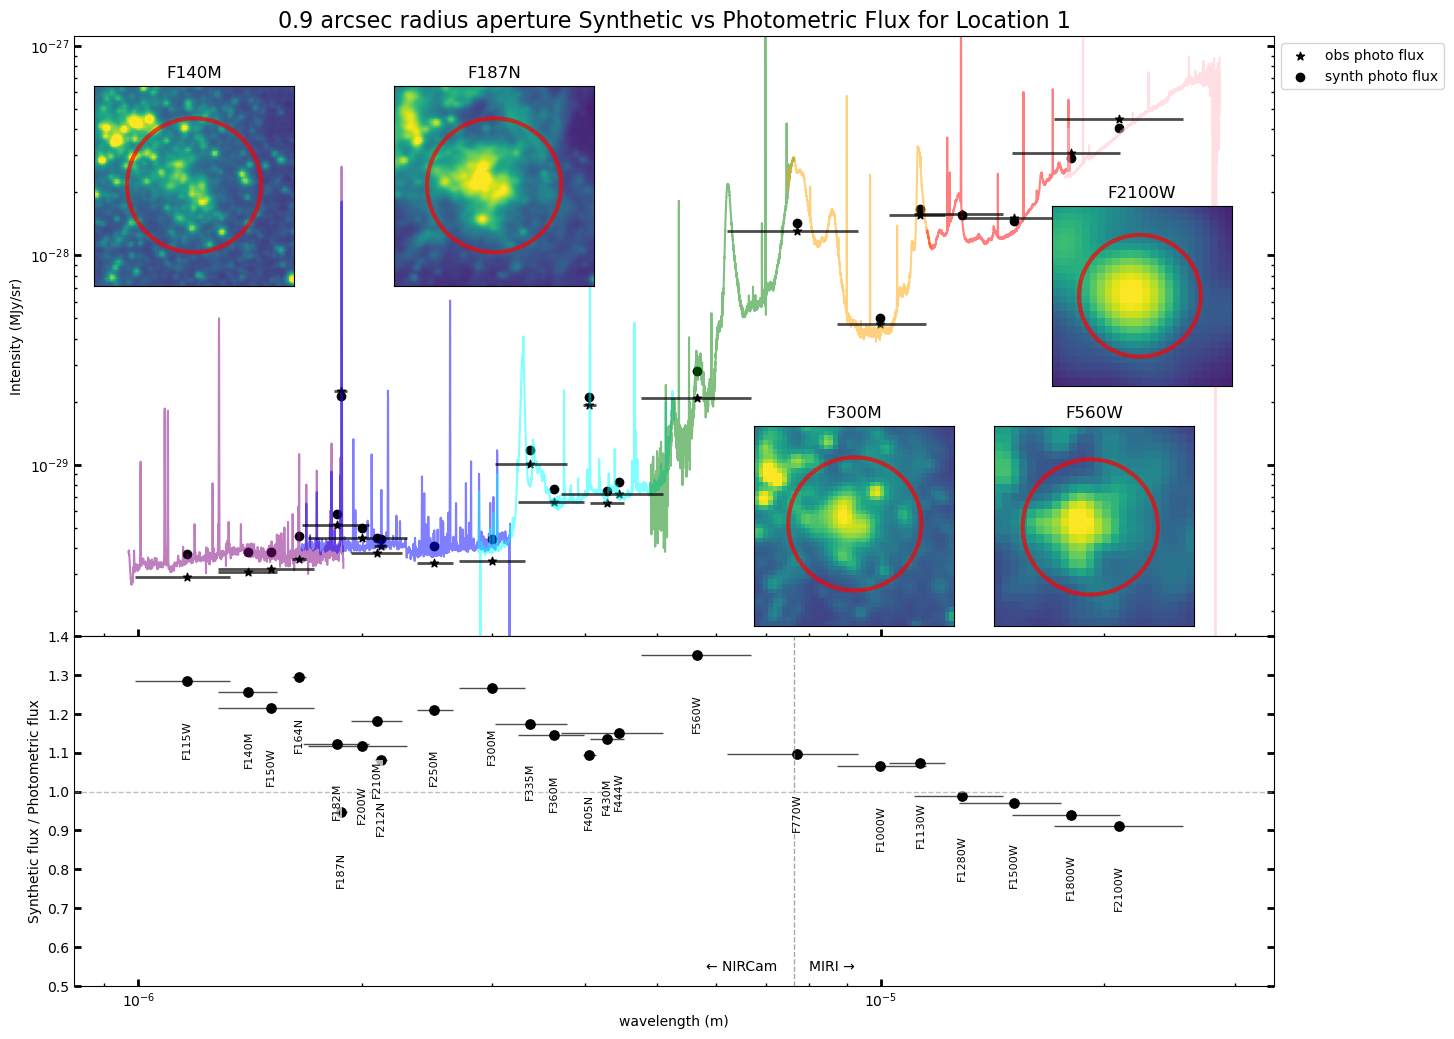

A total of 1446 were detected within 1.0 arcsec in jw03435-o012_t014_nirspec_g140m-f100lp_s3d_trimmed.fits over 1446 WLs
A total of 1424 were detected within 1.0 arcsec in jw03435-o012_t014_nirspec_g235m-f170lp_s3d_trimmed.fits over 1424 WLs
A total of 1341 were detected within 1.0 arcsec in jw03435-o012_t014_nirspec_g395m-f290lp_s3d.fits over 1341 WLs
1.162389e-06
A total of 1446 were detected within 1.0 arcsec in jw03435-o012_t014_nirspec_g140m-f100lp_s3d_trimmed.fits over 1446 WLs
Combined spectrum: 9.7031802861602e-07 -- 1.8893380453519088e-06
1.407446e-06
A total of 1446 were detected within 1.0 arcsec in jw03435-o012_t014_nirspec_g140m-f100lp_s3d_trimmed.fits over 1446 WLs
Combined spectrum: 9.7031802861602e-07 -- 1.8893380453519088e-06
1.510423e-06
A total of 1446 were detected within 1.0 arcsec in jw03435-o012_t014_nirspec_g140m-f100lp_s3d_trimmed.fits over 1446 WLs
Stitching RIGHT: anchor → file 1
A total of 1424 were detected within 1.0 arcsec in jw03435-o012_t014_nirspec_g23

ValueError: Image size of 1454x15308135 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x1000 with 7 Axes>

A total of 1 were detected within 1.1 arcsec in jw03435-o006_t010_nirspec_g395m-f290lp_s3d.fits over 1341 WLs
1.162389e-06
Combined spectrum: 9.7031802861602e-07 -- 1.8893380453519088e-06
1.407446e-06
Combined spectrum: 9.7031802861602e-07 -- 1.8893380453519088e-06
1.510423e-06
Stitching RIGHT: anchor → file 1
Combined spectrum: 9.7031802861602e-07 -- 3.1689100217191535e-06
1.6445950000000002e-06
Stitching RIGHT: anchor → file 1
Combined spectrum: 9.7031802861602e-07 -- 3.1689100217191535e-06
1.84943e-06
Stitching RIGHT: anchor → file 1
Combined spectrum: 9.7031802861602e-07 -- 3.1689100217191535e-06
1.8739650000000003e-06
Stitching RIGHT: anchor → file 1
Combined spectrum: 9.7031802861602e-07 -- 3.1689100217191535e-06
2.0028150000000003e-06
Stitching RIGHT: anchor → file 1
Combined spectrum: 9.7031802861602e-07 -- 3.1689100217191535e-06
2.0982220000000003e-06
Combined spectrum: 1.6605299666408e-06 -- 3.1689100217191535e-06
2.1213970000000003e-06
Combined spectrum: 1.6605299666408e-06 

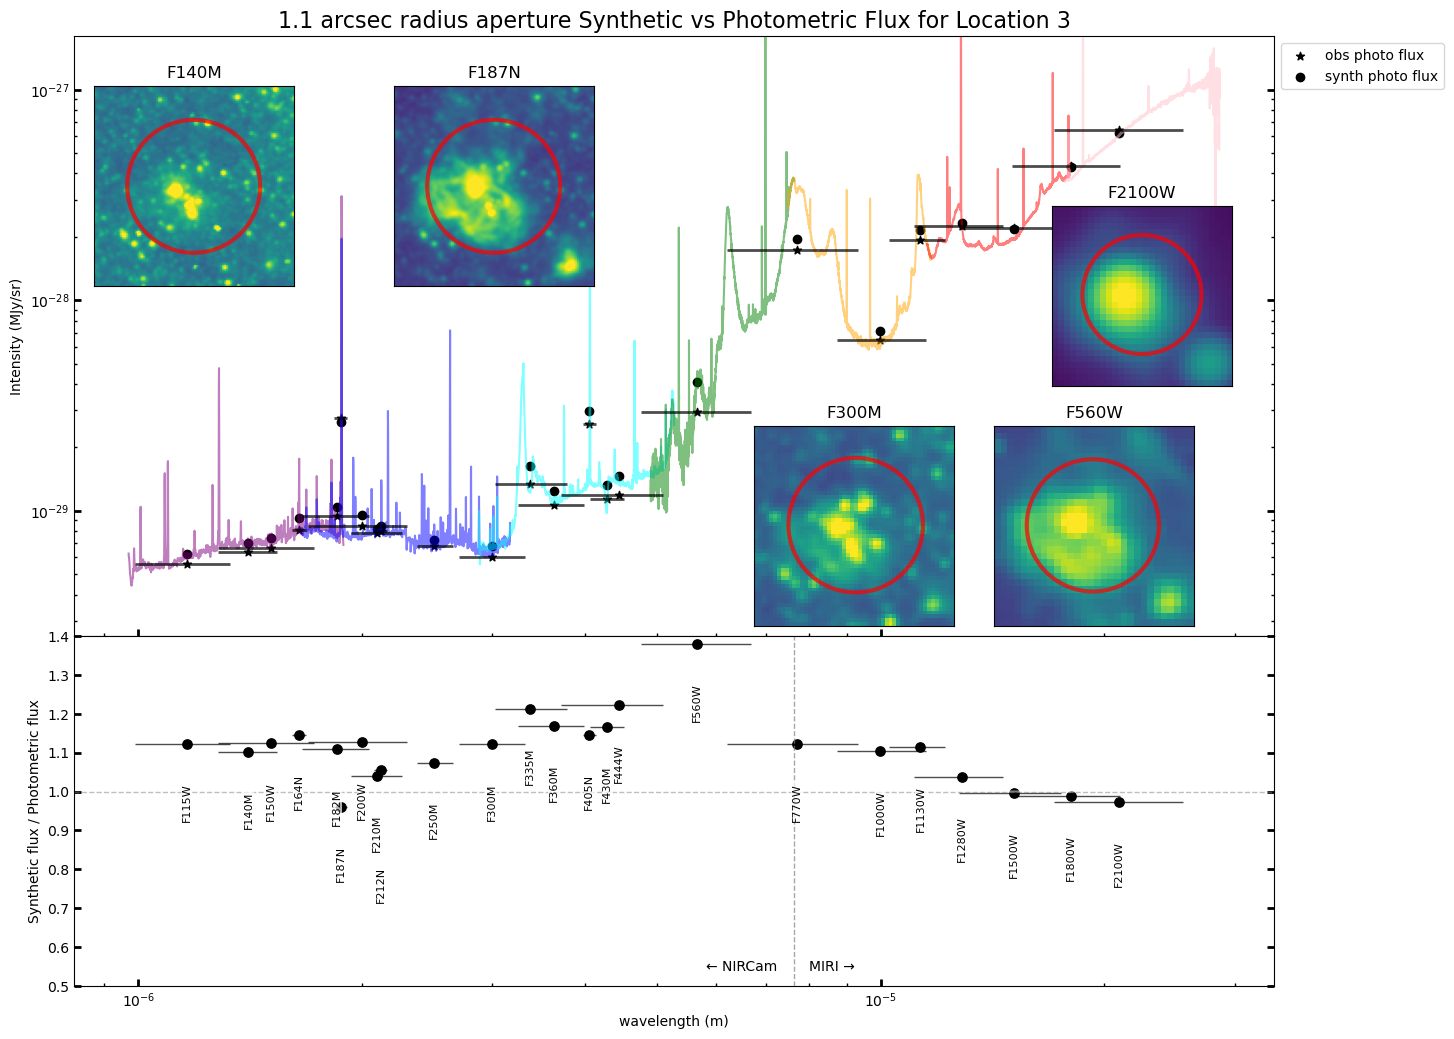

In [26]:
radii = [r0, r1, r2, r3]
files = [full_raw_ifu_files_loc0, full_raw_ifu_files_loc1, full_raw_ifu_files_loc1, full_raw_ifu_files_loc3]
for i in range(4):
    save_fig = f'Spectrum_and_Filters_for_location_{i}.png'
    show_spec_and_all_filters(files[i], v0p3_images, locations[i], radii[i], show_images = [1, 5, 10, 16, 23], save_data = False, save_fig = save_fig)


In [5]:
y_data

[1.2097609582717501,
 1.1718450690970565,
 1.1637773048891278,
 1.1783663127697555,
 1.1988525958846359,
 0.9132175484556212,
 1.2064875294426003,
 0.984978978308386,
 1.0098193430041817,
 0.9280802417278676,
 0.9150798663763685,
 1.0761513091510837,
 1.1321030672381753,
 1.104250038511609,
 1.1818421218984594,
 1.1868444091411174,
 1.294223572764119,
 1.0528577950348326,
 1.075829195056611,
 1.0859024697043709,
 1.0363378537855263,
 0.9880042143206836,
 0.9769683073289483,
 0.6560293281789491]

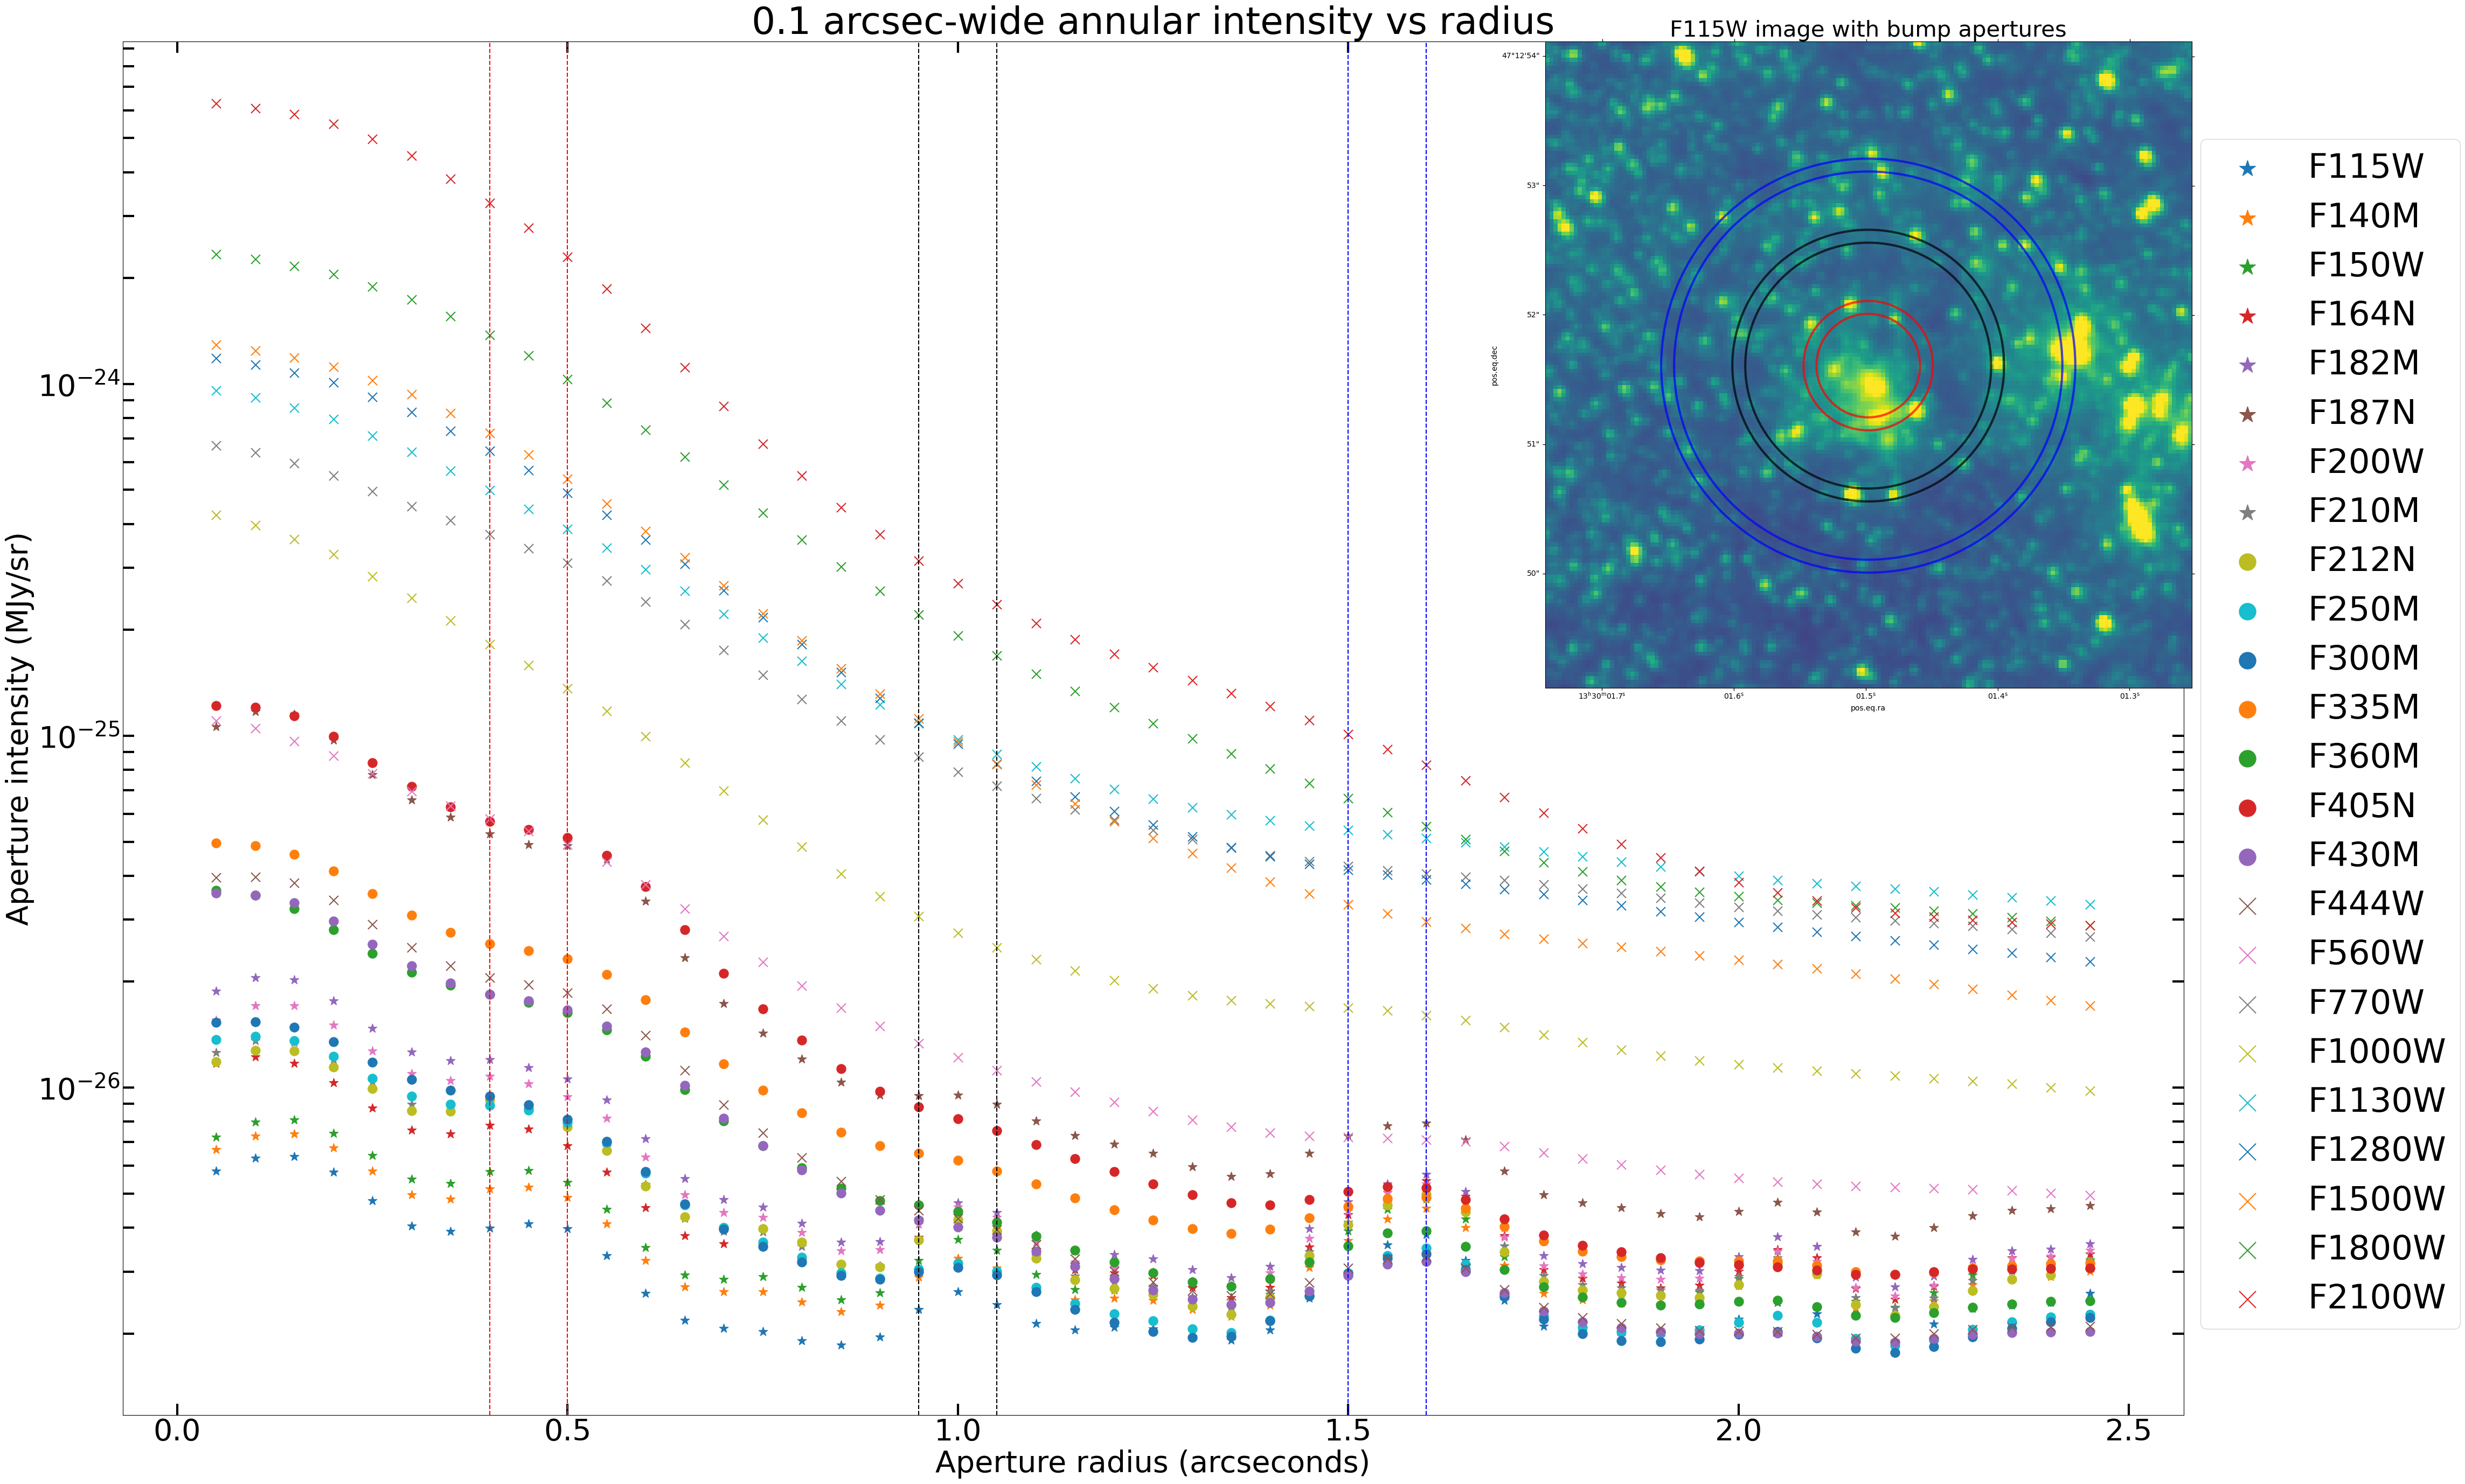

KeyboardInterrupt: 

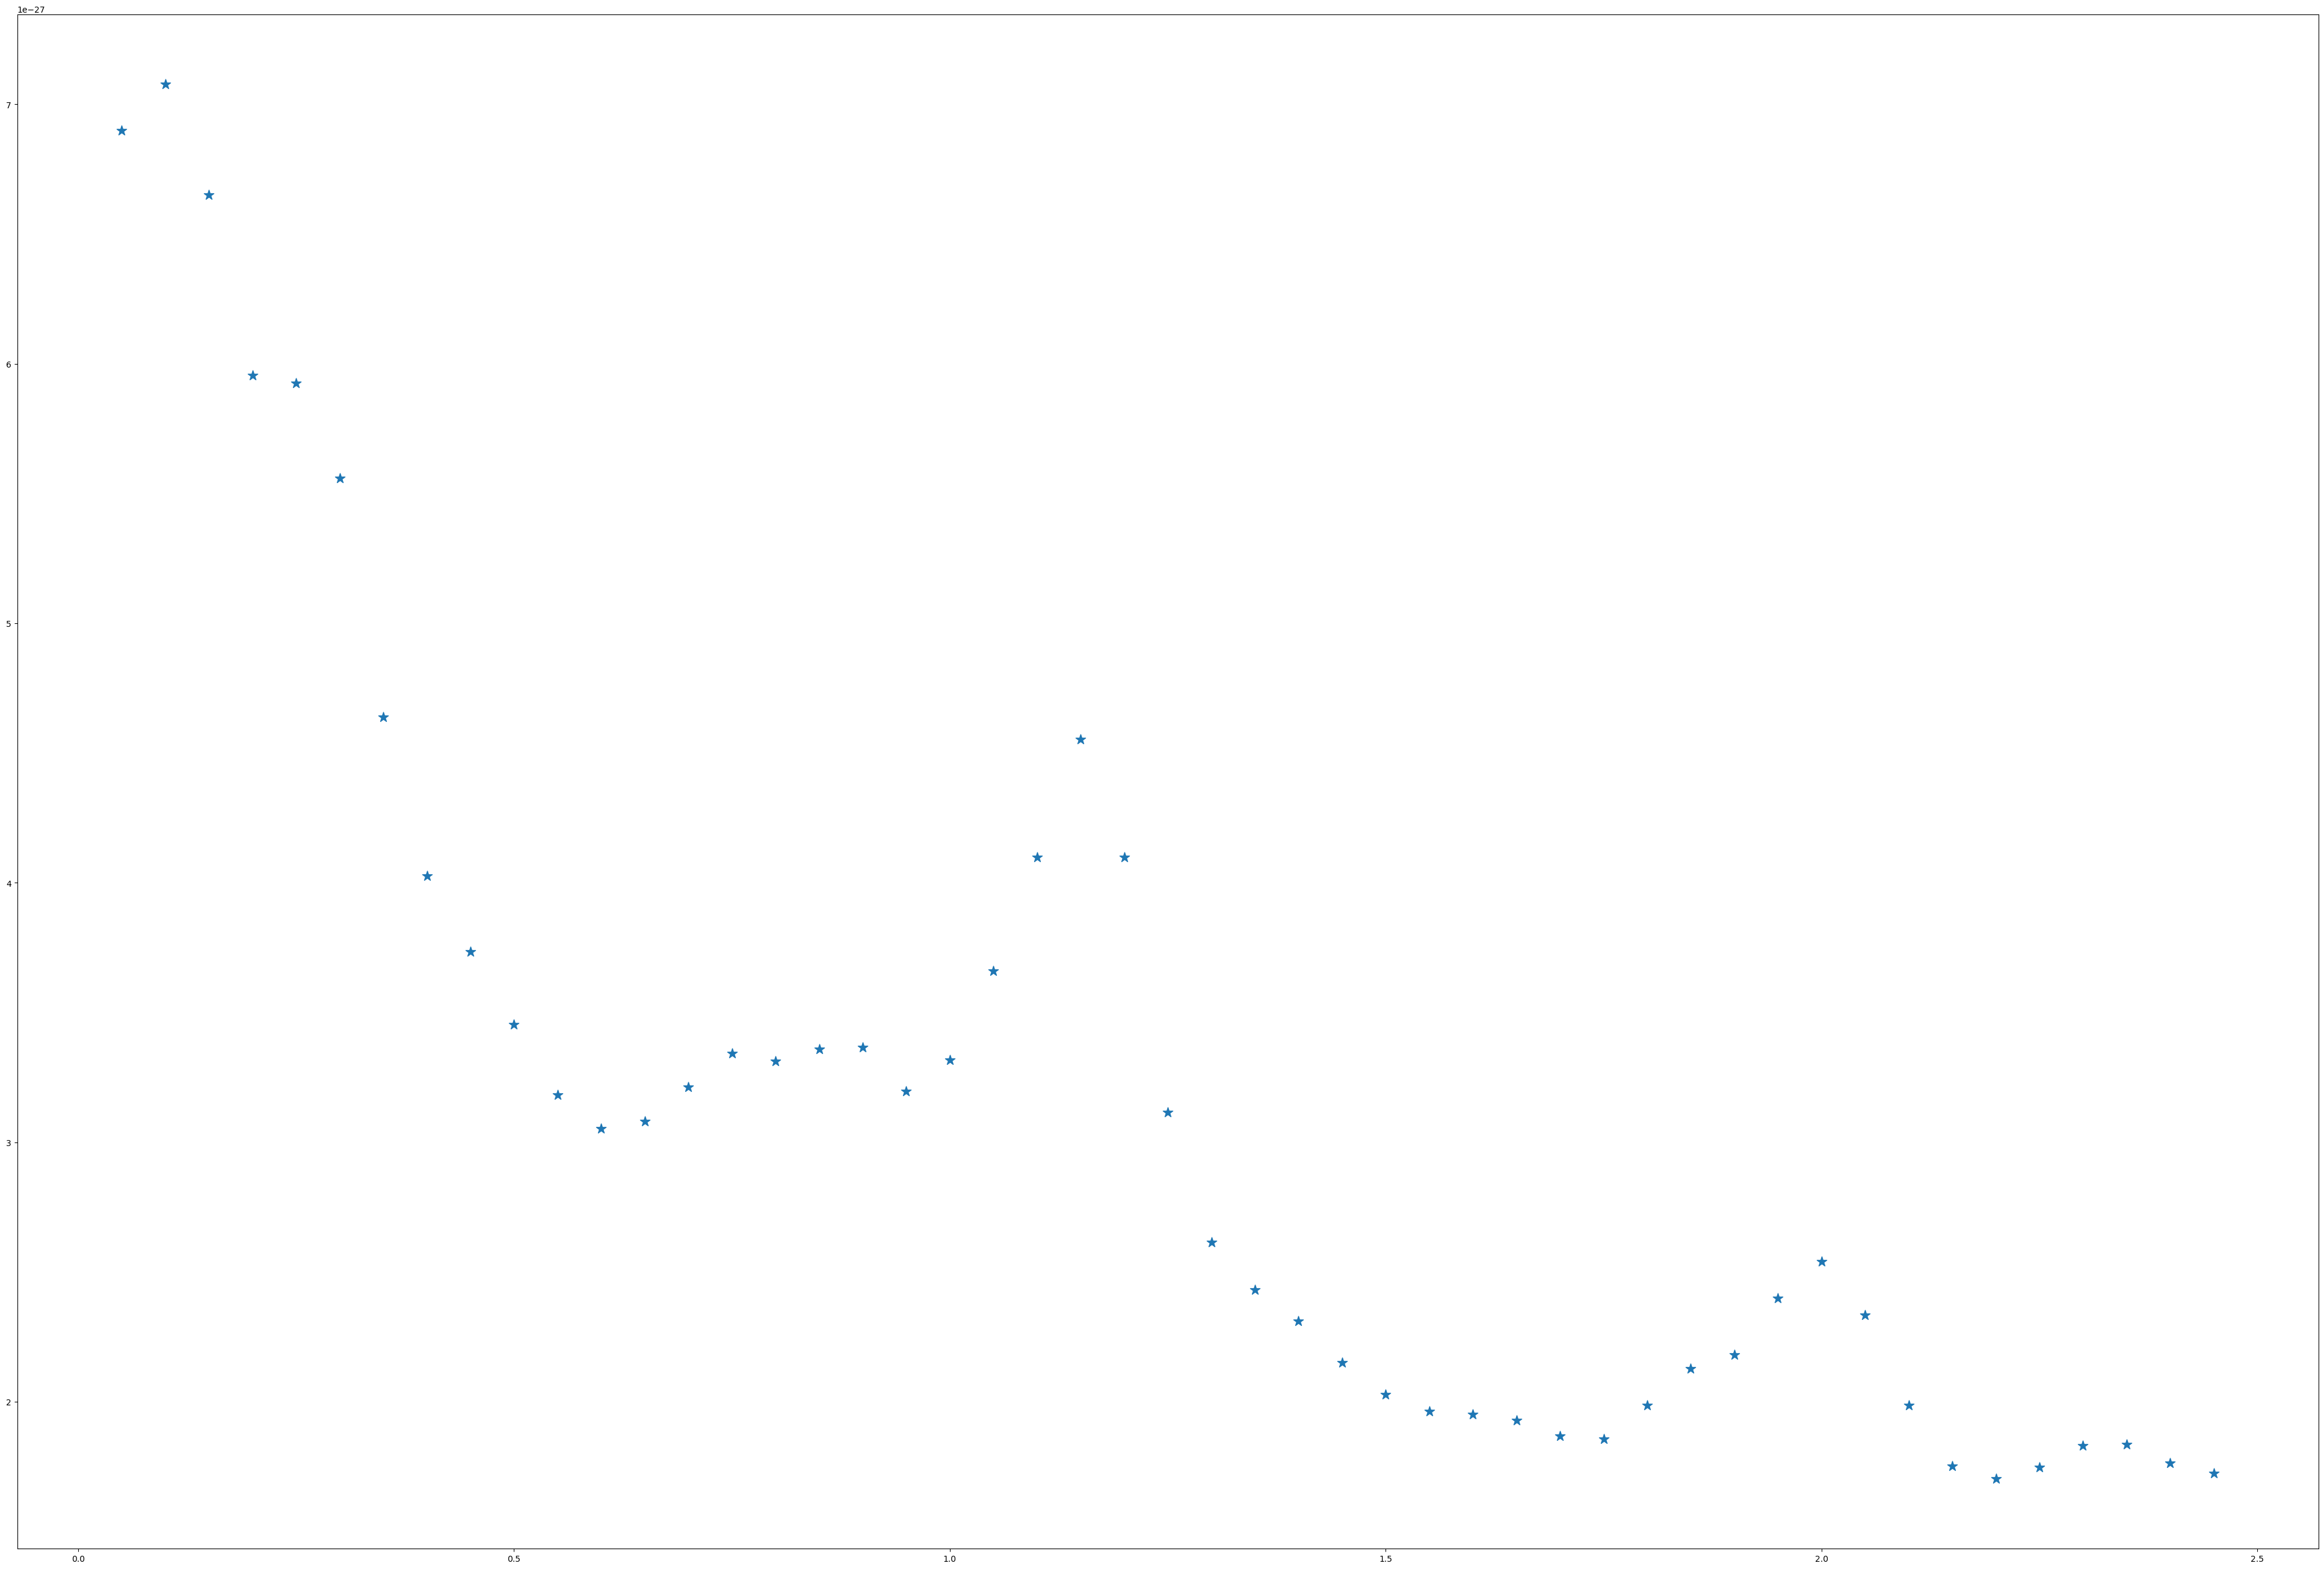

In [4]:
make_radial_profile(v0p3_images, locations[0], thickness = 0.1*u.arcsec, max_radius = 2.5*u.arcsec, show_plot = True, bumps = [0.45, 1, 1.55]*u.arcsec)
make_radial_profile(v0p3_images, locations[1], thickness = 0.1*u.arcsec, max_radius = 2.5*u.arcsec, show_plot = True, bumps = [0]*u.arcsec)
make_radial_profile(v0p3_images, locations[2], thickness = 0.1*u.arcsec, max_radius = 2.5*u.arcsec, show_plot = True, bumps = [0]*u.arcsec)
make_radial_profile(v0p3_images, locations[3], thickness = 0.1*u.arcsec, max_radius = 2.5*u.arcsec, show_plot = True, bumps = [0]*u.arcsec)
print()

Location 0
****************************************************************************************************


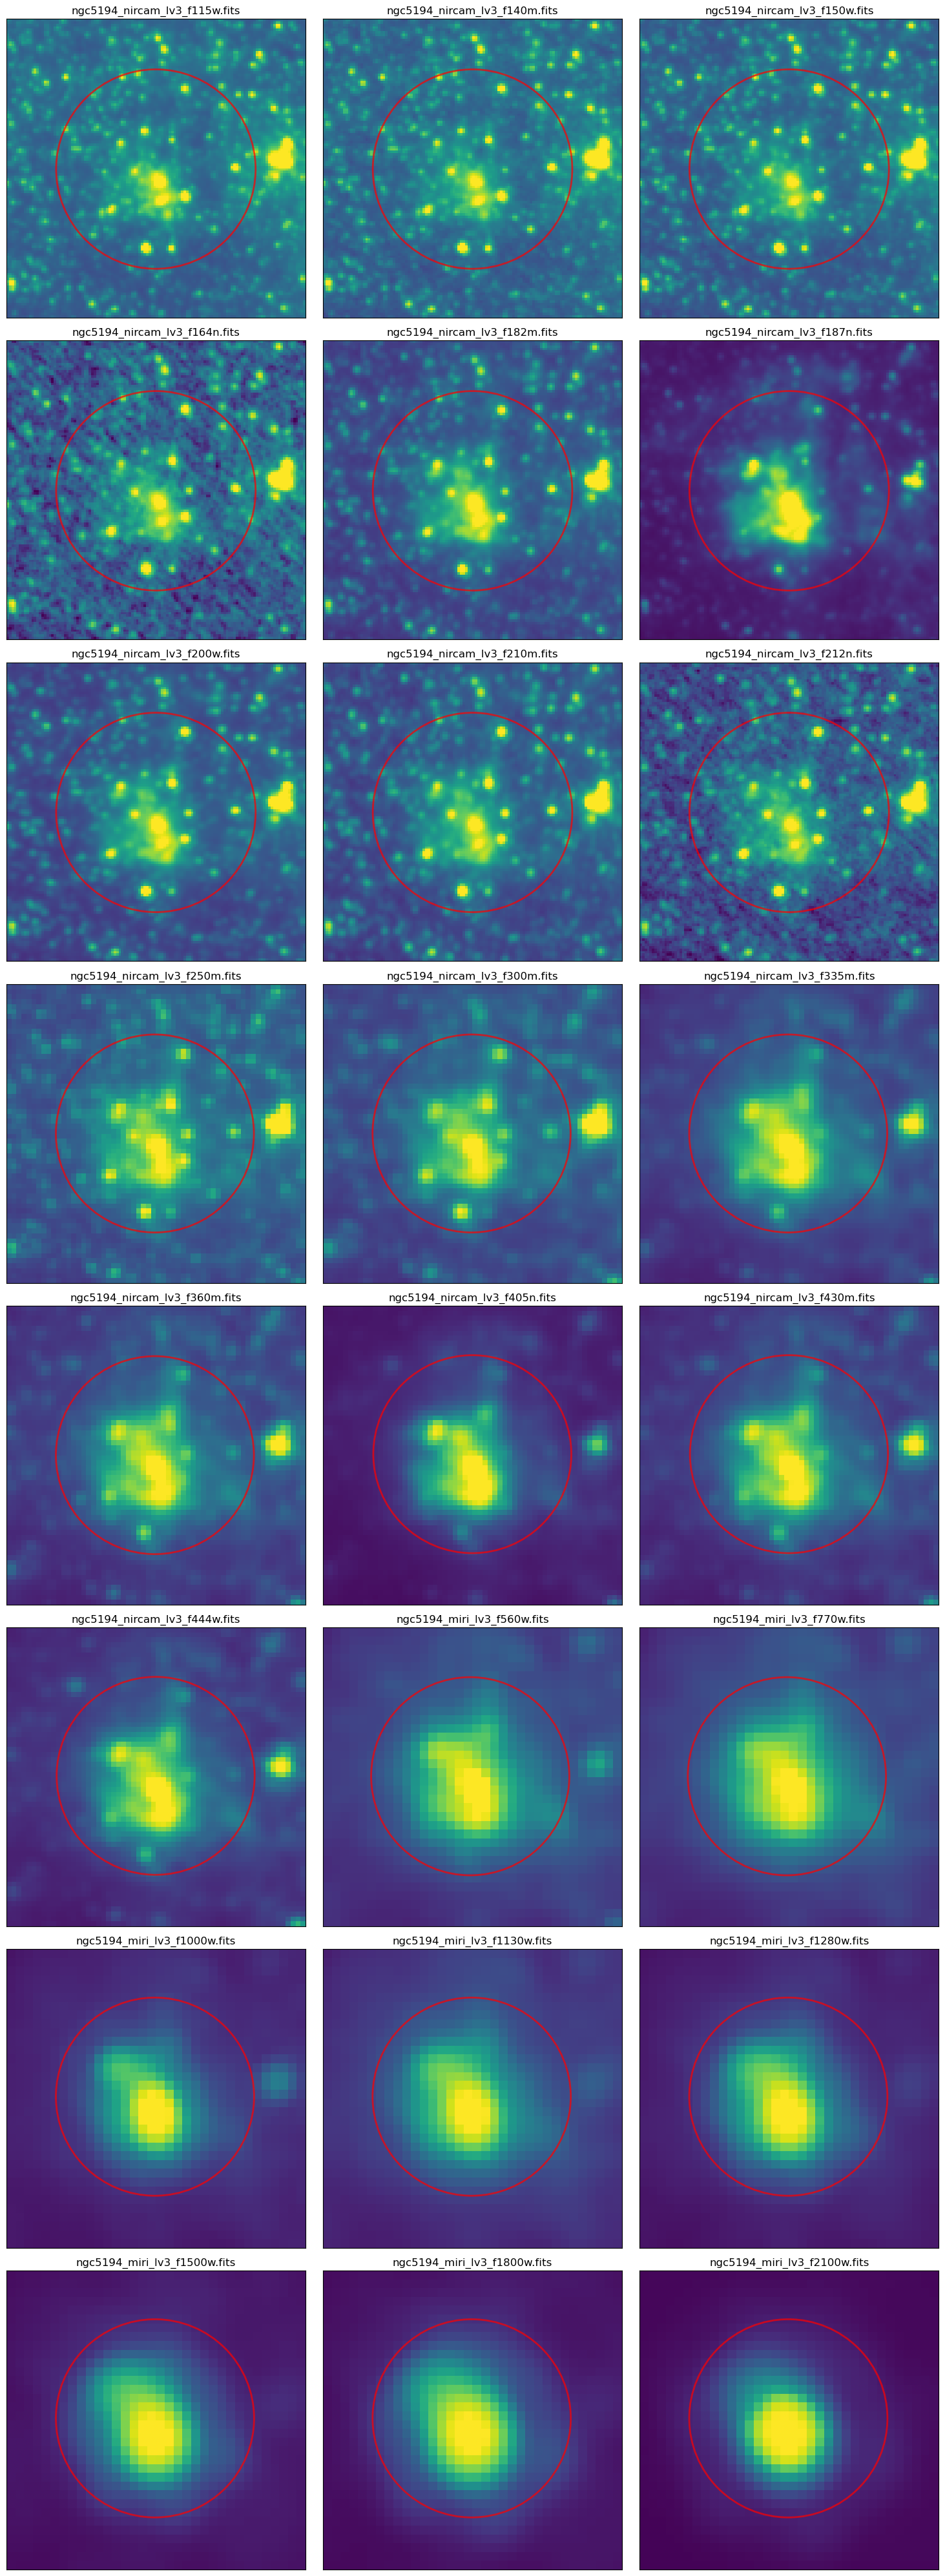

Location 1
****************************************************************************************************


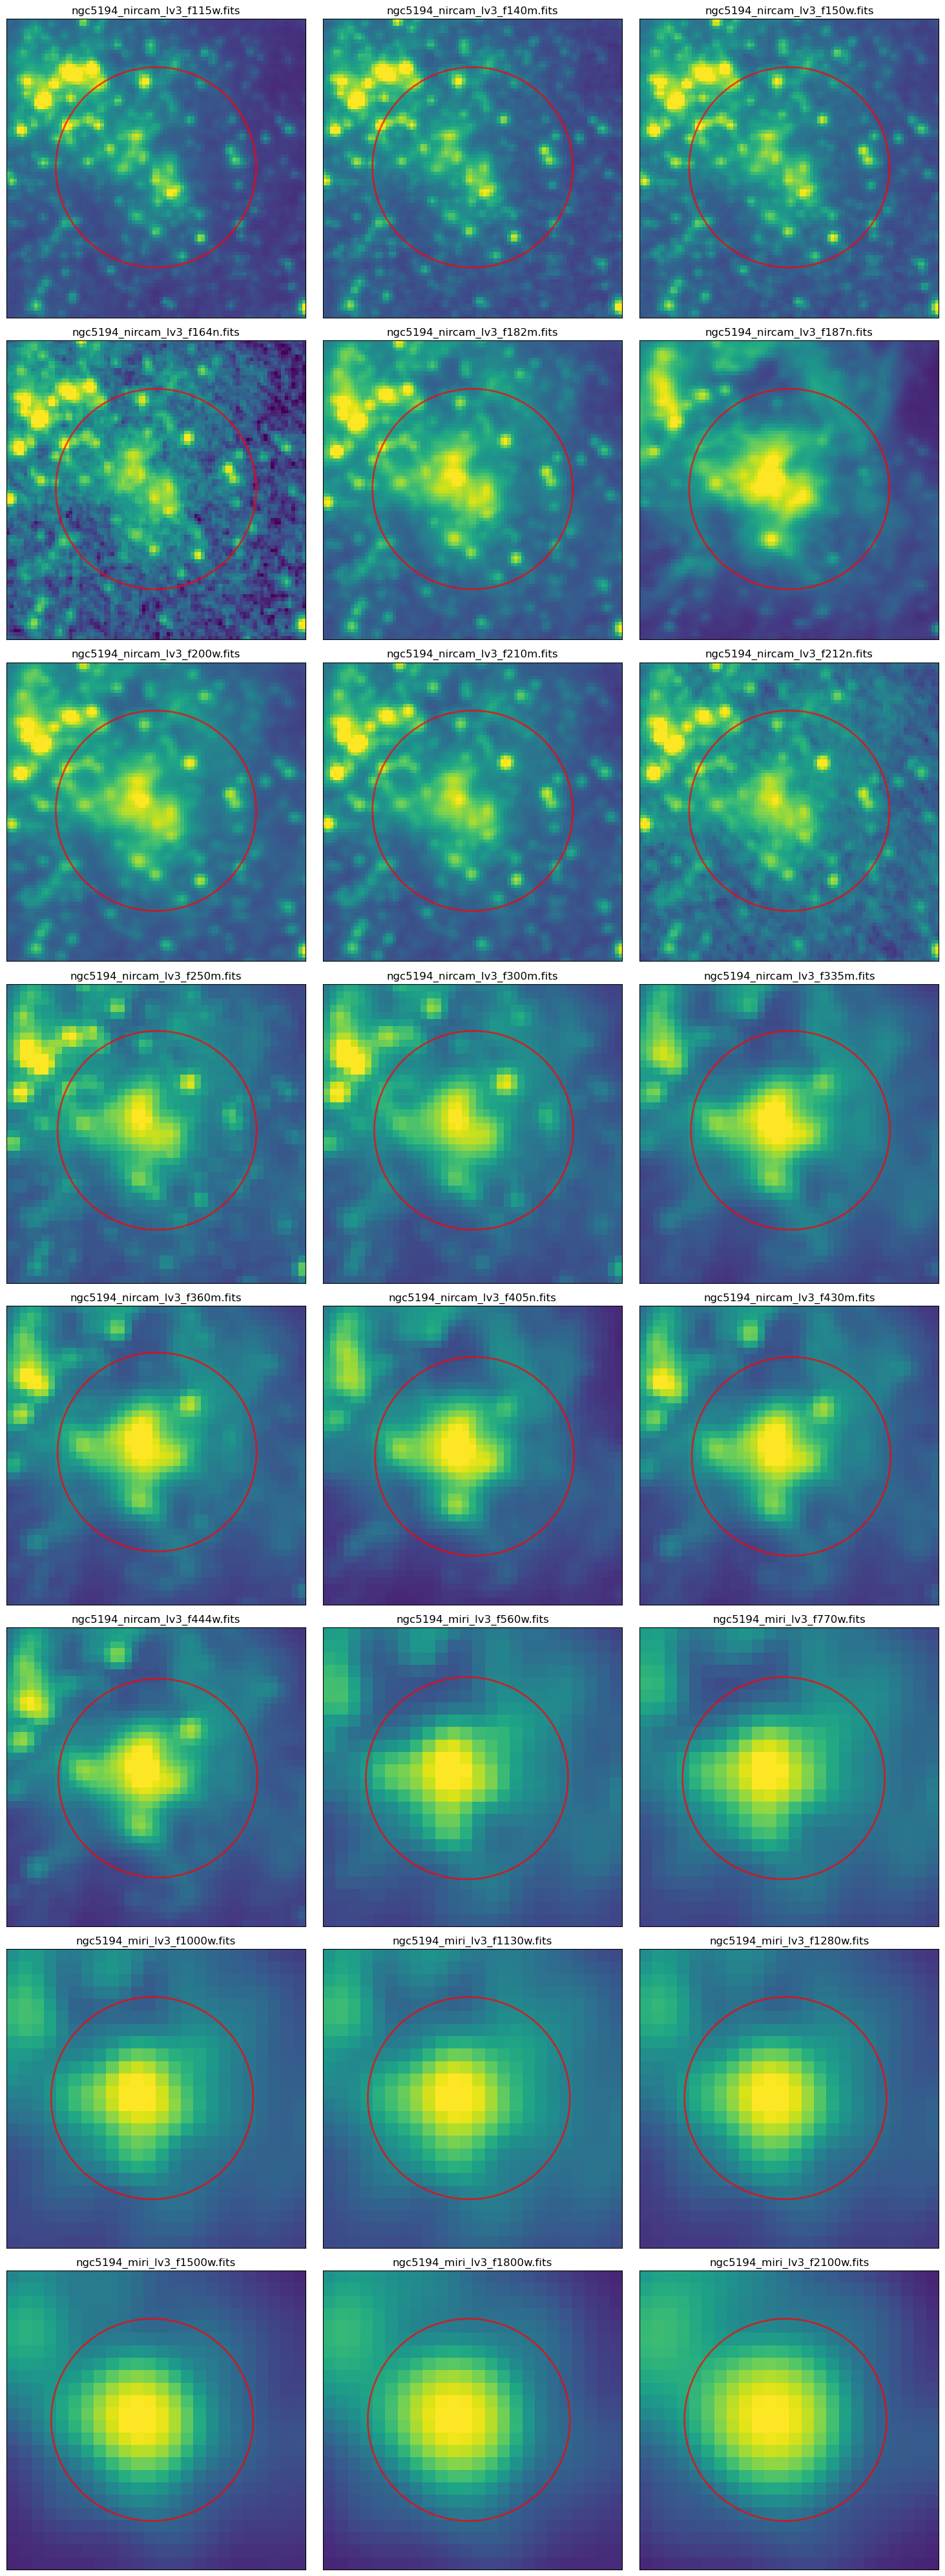

Location 2
****************************************************************************************************


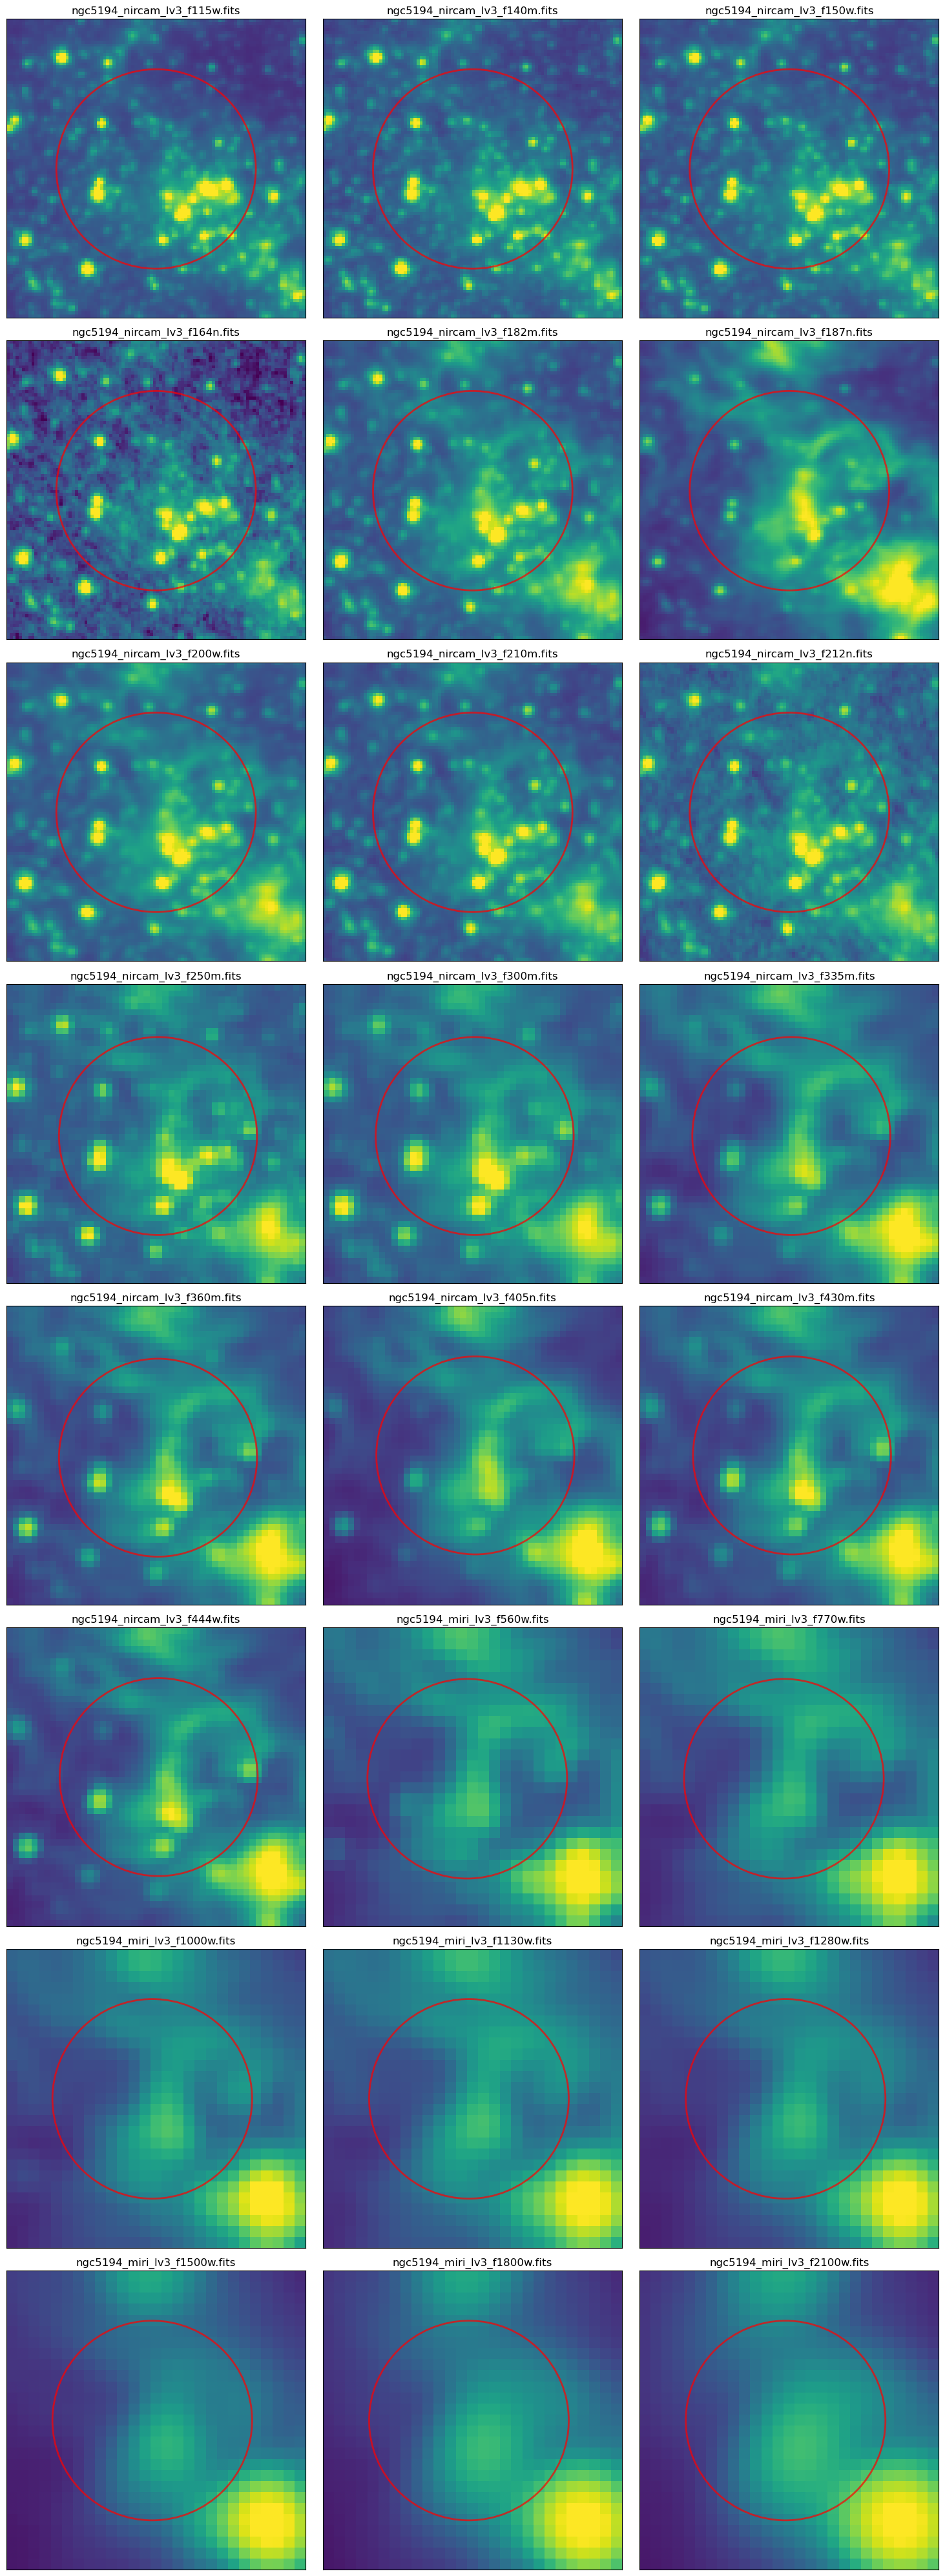

Location 3
****************************************************************************************************


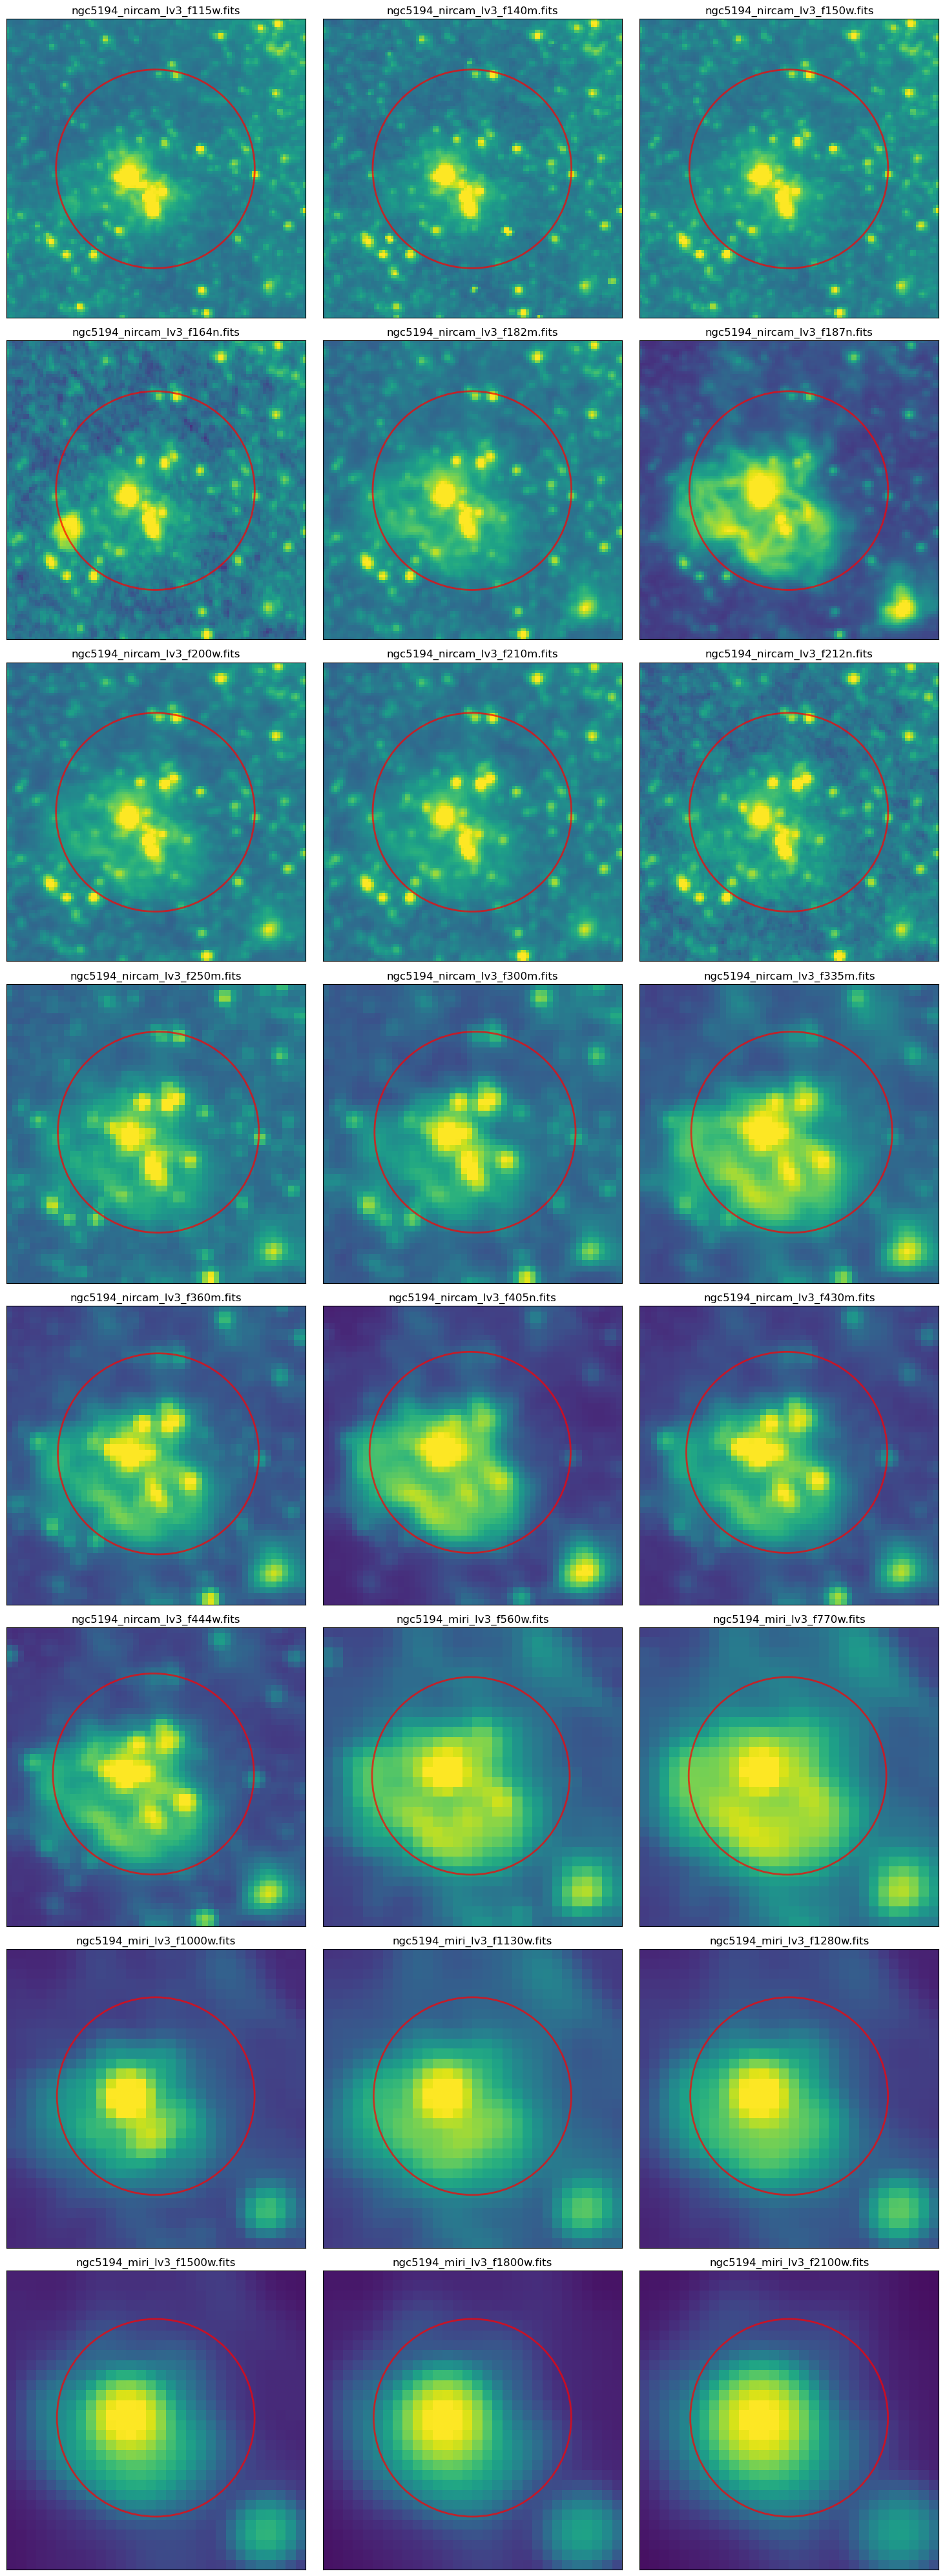

In [27]:
print('Location 0')
print("*"*100)
show_images(v0p3_images, locations[0], 1.25*u.arcsec, ncols=3, cmap='viridis')
print('Location 1')
print("*"*100)
show_images(v0p3_images, locations[1],  0.9*u.arcsec, ncols=3, cmap='viridis')
print('Location 2')
print("*"*100)
show_images(v0p3_images, locations[2],  1*u.arcsec, ncols=3, cmap='viridis')
print('Location 3')
print("*"*100)
show_images(v0p3_images, locations[3],  1.1*u.arcsec, ncols=3, cmap='viridis')


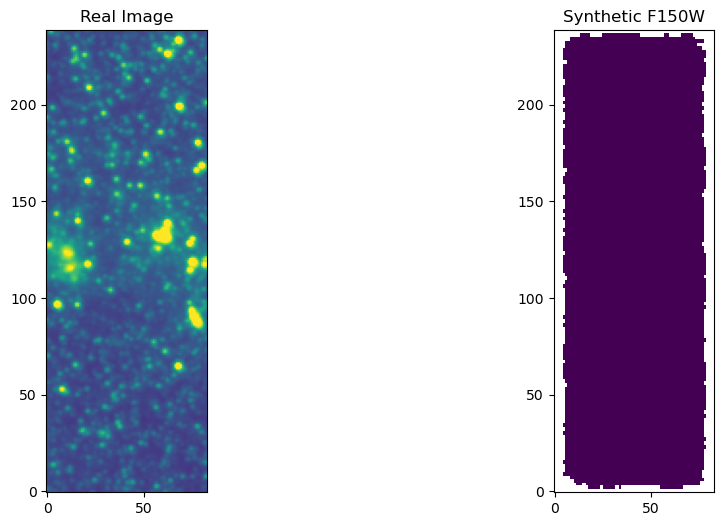

In [35]:
make_synthetic_image(full_raw_ifu_files_loc0[0], "F150W", output_file=None, real_image_file=v0p3_images[2], loc=locations[0], radius=None, display=True, stretch='asinh')

In [32]:
make_synthetic_image?

Signature:
make_synthetic_image(
    ifu_file,
    filter_name,
    output_file=None,
    real_image_file=None,
    loc=None,
    radius=None,
    display=False,
    stretch='asinh',
)
Docstring:
Create a synthetic image through a given filter from an IFU cube.

Parameters
----------
ifu_file : str
    Path to IFU FITS file (flux vs. wavelength, y, x).
filter_name : str
    Name of the filter to apply.
output_file : str, optional
    Name of output FITS file for the synthetic image.
real_image_file : str, optional
    Path to real image file for side-by-side comparison.
display : bool, optional
    If True, display the synthetic image (and real image if provided).
filter_info : dict, optional
    Information needed by `Get_Fnu_transmission`.

Returns
-------
hdu_out : fits.HDUList
    HDU list containing the synthetic image.
File:      /tmp/ipykernel_168341/2174537220.py
Type:      function

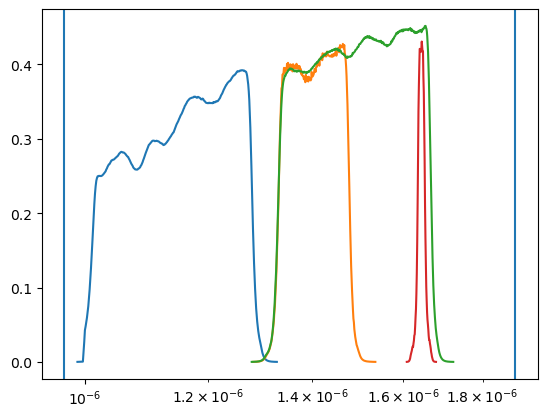

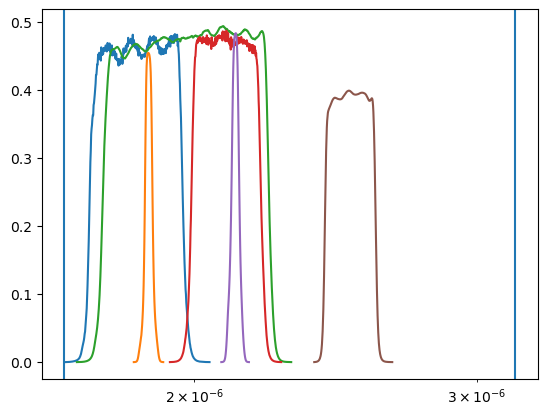

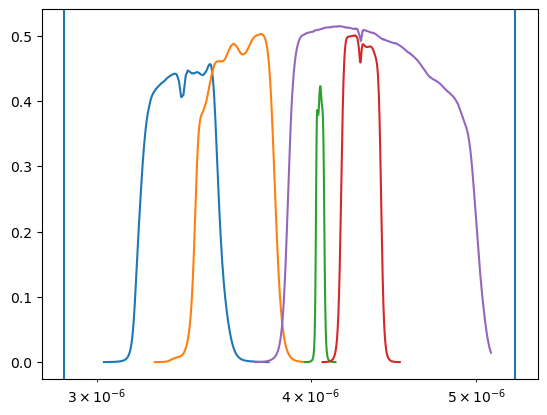

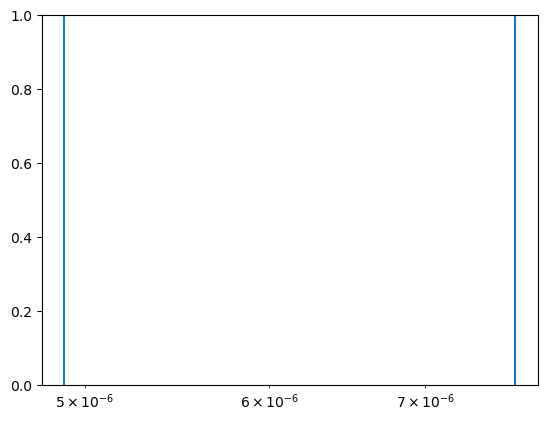

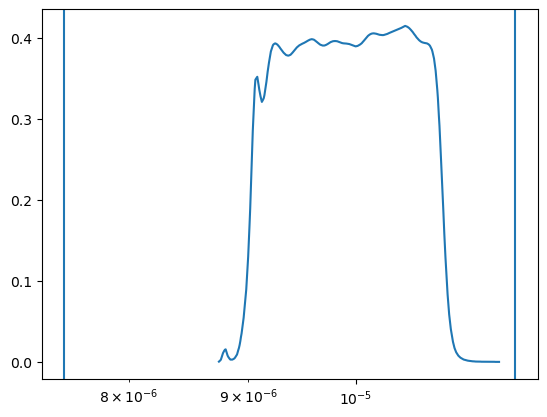

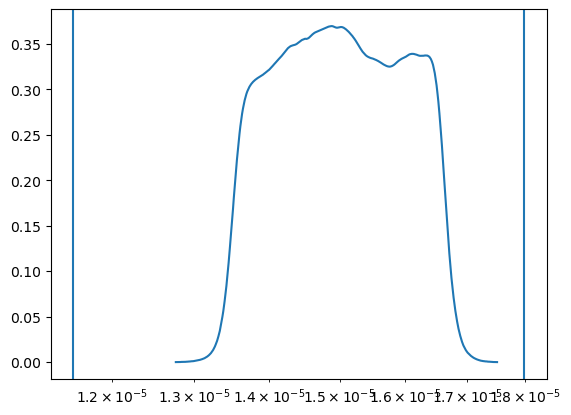

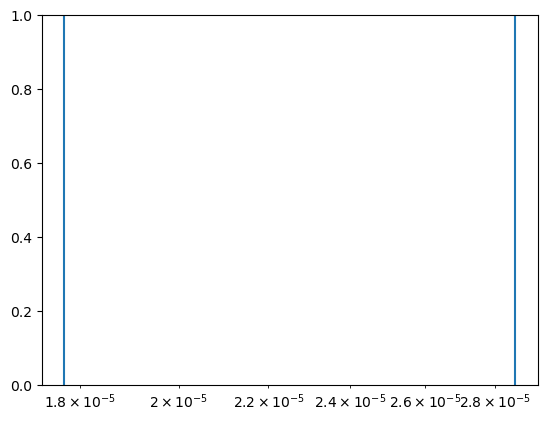

In [17]:
def find_filters_within(ifu_file):
    'returns which filter names are entirely within this cube'
    cube = SpectralCube.read(ifu_file, hdu = 'SCI')
    WL = cube.spectral_axis.to(u.m)
    filters_within = []
    for filter_file in filter_files:
        filter_start, filter_end = get_filter_wl_range(extract_filter_name(filter_file))
        if (filter_start > WL[0]) and (filter_end < WL[-1]):
            filters_within.append(extract_filter_name(filter_file))
            
    return filters_within
    
def calibrate_spectrum(ifu_file, image_files, loc, radius, replace_negatives = False):
    ifu_data = get_IFU_spectrum(ifu_file, loc, radius, replace_negatives = replace_negatives)
    needed_filters = find_filters_within(ifu_file)
    if not needed_filters:
        return ifu_data, ifu_data
    photo_fluxes = []
    synth_fluxes = []
    for filter_name in needed_filters:
        filter_wl, filter_trans = get_filter_data(filter_name)
        synth_fluxes.append(get_Fnu_transmission(ifu_data['intensity'], ifu_data['wavelength'], filter_trans, filter_wl, warnings = True))
        photo_file = [file for file in image_files if extract_filter_name(file) == filter_name][0]
        photo_fluxes.append(get_image_flux(photo_file, loc, radius, replace_negatives = False))
    photo_fluxes = np.array(photo_fluxes)
    synth_fluxes = np.array(synth_fluxes)
    differences = photo_fluxes - synth_fluxes
    mean_synth = []
    mean_corrected = ifu_data['intensity'] + np.mean(differences)
    median_synth = []
    median_corrected = ifu_data['intensity'] + np.median(differences)
    for filter_name in needed_filters:
        filter_wl, filter_trans = get_filter_data(filter_name)
        mean_synth.append(get_Fnu_transmission(mean_corrected, ifu_data['wavelength'], filter_trans, filter_wl, warnings = True))
        median_synth.append(get_Fnu_transmission(median_corrected, ifu_data['wavelength'], filter_trans, filter_wl, warnings = True))
    mean_synth = np.array(mean_synth)
    median_synth = np.array(median_synth)
    mean_dict = {}
    mean_dict['wavelength'] = ifu_data['wavelength']
    mean_dict['intensity'] = mean_corrected

    median_dict = {}
    median_dict['wavelength'] = ifu_data['wavelength']
    median_dict['intensity'] = median_corrected
    
    return mean_dict, median_dict


for file in full_raw_ifu_files_loc0:
    filters = find_filters_within(file)
    cube = SpectralCube.read(file, hdu= 'SCI').spectral_axis.to(u.m).value
    for filter in filters:
        filter_wl, filter_trans = get_filter_data(filter)
        plt.plot(filter_wl, filter_trans)
        filter_mean = jwst_means[filter]
        plt.scatter()
    plt.axvline(x = cube[0])
    plt.axvline(x = cube[-1])
    plt.xscale('log')
    plt.show()

In [ ]:
colors_for_cubes = ['purple', 'blue', 'green', 'yellow', 'orange', 'red', 'pink']
for i, file in enumerate(full_raw_ifu_files_loc0):
    mean_dict, _ = calibrate_spectrum(file, v0p3_images, locations[0], radius, replace_negatives = False)
    plt.loglog(mean_dict['wavelength'], mean_dict['intensity'], color = colors_for_cubes[i])
plt.title('using mean of differences')
plt.show()
for i, file in enumerate(full_raw_ifu_files_loc0):
    _, median_dict = calibrate_spectrum(file, v0p3_images, locations[0], radius, replace_negatives = False)
    plt.loglog(median_dict['wavelength'], median_dict['intensity'], color = colors_for_cubes[i])
plt.title('using median of differences')
plt.show()


In [18]:
for file in full_raw_ifu_files_loc0:
    cube = SpectralCube.read(file, hdu = 'SCI').spectral_axis.to(u.m)
    print(cube[0], cube[-1], find_filters_within(file))

9.7031802861602e-07 m 1.8893380453519088e-06 m ['F115W', 'F140M', 'F150W', 'F164N']
1.6605299666408e-06 m 3.1689100217191535e-06 m ['F182M', 'F187N', 'F200W', 'F210M', 'F212N', 'F250M']
2.870894885563757e-06 m 5.2694948980933964e-06 m ['F335M', 'F360M', 'F405N', 'F430M', 'F444W']
4.9004000953573265e-06 m 7.650000025896587e-06 m []
7.5106502288836055e-06 m 1.1700550240289882e-05 m ['F1000W']
1.155125019070692e-05 m 1.7978750047041097e-05 m ['F1500W']
1.7703000762966e-05 m 2.8623000857886462e-05 m []


In [ ]:
for filter in filter_names:
    print(filter, get_filter_wl_range(filter))
    

array(['Data_files/Image_files/v0p3/ngc5194_nircam_lv3_f115w.fits',
       'Data_files/Image_files/v0p3/ngc5194_nircam_lv3_f140m.fits',
       'Data_files/Image_files/v0p3/ngc5194_nircam_lv3_f150w.fits',
       'Data_files/Image_files/v0p3/ngc5194_nircam_lv3_f164n.fits',
       'Data_files/Image_files/v0p3/ngc5194_nircam_lv3_f182m.fits',
       'Data_files/Image_files/v0p3/ngc5194_nircam_lv3_f187n.fits',
       'Data_files/Image_files/v0p3/ngc5194_nircam_lv3_f200w.fits',
       'Data_files/Image_files/v0p3/ngc5194_nircam_lv3_f210m.fits',
       'Data_files/Image_files/v0p3/ngc5194_nircam_lv3_f212n.fits',
       'Data_files/Image_files/v0p3/ngc5194_nircam_lv3_f250m.fits',
       'Data_files/Image_files/v0p3/ngc5194_nircam_lv3_f300m.fits',
       'Data_files/Image_files/v0p3/ngc5194_nircam_lv3_f335m.fits',
       'Data_files/Image_files/v0p3/ngc5194_nircam_lv3_f360m.fits',
       'Data_files/Image_files/v0p3/ngc5194_nircam_lv3_f405n.fits',
       'Data_files/Image_files/v0p3/ngc5194_nirc